In [1]:
#读取数据
import pandas as pd
Data=pd.read_excel('/mnt/workspace/Data/Anti_Lose.xlsx')
Data.head(10)

,age,lose,CD4/8,CD3+_value,CD3+CD8+value,CD3+CD4+_value,NK_value,B_value,CD3+%,CD3+CD8+%,...,Anti_PA,Anti_CPB,Anti_SRP,Anti_R52,Anti_SS,Anti_J1,Anti_DA,Anti_SM,Anti_PM,AnuA
0,32,2,0.96,2828.0,1340.0,1284.0,238.0,78.0,0.8992,0.4261,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴
1,31,2,1.19,1617.0,667.0,794.0,60.0,293.0,0.8195,0.3379,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴
2,33,2,1.34,986.0,394.0,528.0,667.0,64.0,0.5741,0.2296,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴
3,28,2,1.26,930.0,361.0,456.0,255.0,47.0,0.7544,0.2926,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴
4,39,3,1.34,1265.0,514.0,689.0,617.0,75.0,0.6462,0.2623,...,阴,阴,阴,阴,阴,阳,阴,阴,阴,阴
5,31,2,1.12,1033.0,456.0,509.0,284.0,53.0,0.7543,0.3332,...,阳,阴,阴,阴,阴,阴,阴,阴,阴,阴
6,32,2,1.26,1143.0,498.0,627.0,368.0,62.0,0.7258,0.3163,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴
7,33,2,1.04,1456.0,593.0,615.0,448.0,82.0,0.7322,0.2984,...,阴,阴,阴,阴,阳,阴,阴,阴,阴,阴
8,35,2,1.55,1586.0,569.0,884.0,83.0,199.0,0.8446,0.3032,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴
9,26,2,1.11,1465.0,640.0,707.0,709.0,101.0,0.6439,0.2812,...,阴,阴,阴,阴,阴,阴,阴,阴,阴,阴


数据清洗

In [2]:
#检查数据信息
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1554 non-null   int64  
 1   lose            1553 non-null   object 
 2   CD4/8           1554 non-null   float64
 3   CD3+_value      1547 non-null   float64
 4   CD3+CD8+value   1547 non-null   float64
 5   CD3+CD4+_value  1547 non-null   float64
 6   NK_value        1547 non-null   float64
 7   B_value         1547 non-null   float64
 8   CD3+%           1554 non-null   float64
 9   CD3+CD8+%       1554 non-null   float64
 10  CD3+CD4+%       1554 non-null   float64
 11  NK%             1554 non-null   float64
 12  B%              1554 non-null   float64
 13  Anti_J          1251 non-null   object 
 14  Anti_Z          1251 non-null   object 
 15  Anti_N          1251 non-null   object 
 16  Anti_ATOAb      1368 non-null   object 
 17  Anti_Total      1404 non-null   o

In [3]:
#统计空缺数据
Data.isnull().sum()

age                 0
lose                1
CD4/8               0
CD3+_value          7
CD3+CD8+value       7
CD3+CD4+_value      7
NK_value            7
B_value             7
CD3+%               0
CD3+CD8+%           0
CD3+CD4+%           0
NK%                 0
B%                  0
Anti_J            303
Anti_Z            303
Anti_N            303
Anti_ATOAb        186
Anti_Total        150
Anti_H            150
Anti_A1           268
Anti_S7           150
Anti_SA           150
Anti_X            150
Anti_HP           150
Anti_ZP           150
Anti_PA           150
Anti_CPB          150
Anti_SRP          150
Anti_R52          150
Anti_SS           150
Anti_J1           150
Anti_DA           150
Anti_SM           150
Anti_PM           150
AnuA              147
dtype: int64

In [4]:
#统计空缺数据信息
Null_label=['lose','CD3+_value','CD3+CD8+value','CD3+CD4+_value','NK_value','B_value']
for label in Null_label:
    print(Data[label].value_counts())

lose
2          959
3          230
1          135
0          118
4           72
5           25
6            6
7            5
9            1
2；5月后妊娠      1
11           1
Name: count, dtype: int64
CD3+_value
1226.0    7
1143.0    7
1342.0    7
1029.0    7
1377.0    6
         ..
707.0     1
1713.0    1
1398.0    1
1277.0    1
1090.0    1
Name: count, Length: 899, dtype: int64
CD3+CD8+value
477.0    10
385.0     9
421.0     9
320.0     9
443.0     9
         ..
213.0     1
790.0     1
551.0     1
530.0     1
947.0     1
Name: count, Length: 610, dtype: int64
CD3+CD4+_value
829.0     10
665.0      9
565.0      8
659.0      8
651.0      8
          ..
1505.0     1
498.0      1
408.0      1
457.0      1
826.0      1
Name: count, Length: 693, dtype: int64
NK_value
267.0    11
206.0    10
260.0     9
268.0     9
218.0     9
         ..
869.0     1
384.0     1
948.0     1
886.0     1
663.0     1
Name: count, Length: 596, dtype: int64
B_value
163.0    16
185.0    14
193.0    14
164.0    14
213.

In [5]:
#补充空缺数据
Fillna_list=[2,1226.0,477.0,829.0,267.0,163.0]
for label,fillna in zip(Null_label,Fillna_list):
    Data[label].fillna(fillna,inplace=True)
Data.isnull().sum()

age                 0
lose                0
CD4/8               0
CD3+_value          0
CD3+CD8+value       0
CD3+CD4+_value      0
NK_value            0
B_value             0
CD3+%               0
CD3+CD8+%           0
CD3+CD4+%           0
NK%                 0
B%                  0
Anti_J            303
Anti_Z            303
Anti_N            303
Anti_ATOAb        186
Anti_Total        150
Anti_H            150
Anti_A1           268
Anti_S7           150
Anti_SA           150
Anti_X            150
Anti_HP           150
Anti_ZP           150
Anti_PA           150
Anti_CPB          150
Anti_SRP          150
Anti_R52          150
Anti_SS           150
Anti_J1           150
Anti_DA           150
Anti_SM           150
Anti_PM           150
AnuA              147
dtype: int64

In [6]:
#处理抗体空缺数据
for Anti_tabel in Data.iloc[:,13:].columns:
    Data[Anti_tabel].fillna('阴',inplace=True)
Data.isnull().sum()

age               0
lose              0
CD4/8             0
CD3+_value        0
CD3+CD8+value     0
CD3+CD4+_value    0
NK_value          0
B_value           0
CD3+%             0
CD3+CD8+%         0
CD3+CD4+%         0
NK%               0
B%                0
Anti_J            0
Anti_Z            0
Anti_N            0
Anti_ATOAb        0
Anti_Total        0
Anti_H            0
Anti_A1           0
Anti_S7           0
Anti_SA           0
Anti_X            0
Anti_HP           0
Anti_ZP           0
Anti_PA           0
Anti_CPB          0
Anti_SRP          0
Anti_R52          0
Anti_SS           0
Anti_J1           0
Anti_DA           0
Anti_SM           0
Anti_PM           0
AnuA              0
dtype: int64

In [7]:
#替换Lose列错误信息
Data['lose'].replace('2；5月后妊娠',0,inplace=True)

In [8]:
#转化数据类型
Encoder_label={'阴':0,'阳':1}
for Anti_Target in Data.iloc[:,13:].columns:
    Data[Anti_Target+'_Encoder']=Data.loc[:,Anti_Target].map(Encoder_label)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1554 non-null   int64  
 1   lose                1554 non-null   int64  
 2   CD4/8               1554 non-null   float64
 3   CD3+_value          1554 non-null   float64
 4   CD3+CD8+value       1554 non-null   float64
 5   CD3+CD4+_value      1554 non-null   float64
 6   NK_value            1554 non-null   float64
 7   B_value             1554 non-null   float64
 8   CD3+%               1554 non-null   float64
 9   CD3+CD8+%           1554 non-null   float64
 10  CD3+CD4+%           1554 non-null   float64
 11  NK%                 1554 non-null   float64
 12  B%                  1554 non-null   float64
 13  Anti_J              1554 non-null   object 
 14  Anti_Z              1554 non-null   object 
 15  Anti_N              1554 non-null   object 
 16  Anti_A

查看数据集描述性信息

In [9]:
Data_describe_Inspection=Data.iloc[:,:13].describe()
Data_describe_Inspection

,age,lose,CD4/8,CD3+_value,CD3+CD8+value,CD3+CD4+_value,NK_value,B_value,CD3+%,CD3+CD8+%,CD3+CD4+%,NK%,B%
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000
mean,32.698842,2.090734,1.547780,1339.802445,505.362934,717.081081,359.295367,214.550837,0.698521,0.263275,0.375208,0.169914,0.128795
std,4.829685,1.043857,0.586078,475.821348,207.519219,254.525643,205.600347,103.326739,0.085550,0.069841,0.071799,0.081473,0.062073
min,18.000000,0.000000,0.290000,91.000000,47.000000,64.000000,27.000000,46.000000,0.006605,0.001606,0.003237,0.001013,0.013900
25%,29.000000,2.000000,1.120000,1040.000000,361.000000,540.250000,217.000000,145.000000,0.647825,0.216025,0.326300,0.109050,0.089700
50%,33.000000,2.000000,1.470000,1264.000000,477.000000,675.000000,312.500000,195.000000,0.706550,0.255700,0.374100,0.150150,0.115150
75%,35.000000,2.000000,1.850000,1575.000000,607.750000,846.500000,455.000000,259.750000,0.760525,0.305900,0.419150,0.214050,0.150175
max,48.000000,11.000000,4.720000,7870.000000,1908.000000,2520.000000,1875.000000,1014.000000,0.899200,0.824200,0.739400,0.524600,0.773700


In [10]:
Data_describe_Inspection.T

,count,mean,std,min,25%,50%,75%,max
age,1554.0,32.698842,4.829685,18.000000,29.000000,33.00000,35.000000,48.0000
lose,1554.0,2.090734,1.043857,0.000000,2.000000,2.00000,2.000000,11.0000
CD4/8,1554.0,1.547780,0.586078,0.290000,1.120000,1.47000,1.850000,4.7200
CD3+_value,1554.0,1339.802445,475.821348,91.000000,1040.000000,1264.00000,1575.000000,7870.0000
CD3+CD8+value,1554.0,505.362934,207.519219,47.000000,361.000000,477.00000,607.750000,1908.0000
CD3+CD4+_value,1554.0,717.081081,254.525643,64.000000,540.250000,675.00000,846.500000,2520.0000
NK_value,1554.0,359.295367,205.600347,27.000000,217.000000,312.50000,455.000000,1875.0000
B_value,1554.0,214.550837,103.326739,46.000000,145.000000,195.00000,259.750000,1014.0000
CD3+%,1554.0,0.698521,0.085550,0.006605,0.647825,0.70655,0.760525,0.8992
CD3+CD8+%,1554.0,0.263275,0.069841,0.001606,0.216025,0.25570,0.305900,0.8242


In [11]:
#输出抗体描述性统计学信息
Data_describe_Inspection.to_excel('/mnt/workspace/Analysis_Result/Data_describe_Inspection.xlsx')

In [12]:
#输出抗体数据
for anti in Data.iloc[:,35:].columns:
    print(Data.loc[:,anti].value_counts())

Anti_J_Encoder
0.0    1374
1.0     149
Name: count, dtype: int64
Anti_Z_Encoder
0.0    1496
1.0      48
Name: count, dtype: int64
Anti_N_Encoder
0.0    1526
1.0      22
Name: count, dtype: int64
Anti_ATOAb_Encoder
0.0    1083
1.0     399
Name: count, dtype: int64
Anti_Total_Encoder
0.0    1021
1.0     532
Name: count, dtype: int64
Anti_H_Encoder
0.0    1331
1.0     220
Name: count, dtype: int64
Anti_A1_Encoder
0    1553
1       1
Name: count, dtype: int64
Anti_S7_Encoder
0    1531
1      23
Name: count, dtype: int64
Anti_SA_Encoder
0.0    1472
1.0      81
Name: count, dtype: int64
Anti_X_Encoder
0.0    1524
1.0      29
Name: count, dtype: int64
Anti_HP_Encoder
0    1539
1      15
Name: count, dtype: int64
Anti_ZP_Encoder
0.0    1488
1.0      64
Name: count, dtype: int64
Anti_PA_Encoder
0    1506
1      48
Name: count, dtype: int64
Anti_CPB_Encoder
0    1541
1      13
Name: count, dtype: int64
Anti_SRP_Encoder
0    1511
1      43
Name: count, dtype: int64
Anti_R52_Encoder
0.0    1480
1.

构建机器学习模型和深度学习模型预测lose

In [13]:
#构建机器学习模型
PredictLose=['age']+list(Data.iloc[:,2:13].columns)    #获取基本数据
PredictLose_Data=Data.loc[:,PredictLose]    #获取值数据
PredictLose_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1554 non-null   int64  
 1   CD4/8           1554 non-null   float64
 2   CD3+_value      1554 non-null   float64
 3   CD3+CD8+value   1554 non-null   float64
 4   CD3+CD4+_value  1554 non-null   float64
 5   NK_value        1554 non-null   float64
 6   B_value         1554 non-null   float64
 7   CD3+%           1554 non-null   float64
 8   CD3+CD8+%       1554 non-null   float64
 9   CD3+CD4+%       1554 non-null   float64
 10  NK%             1554 non-null   float64
 11  B%              1554 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 145.8 KB


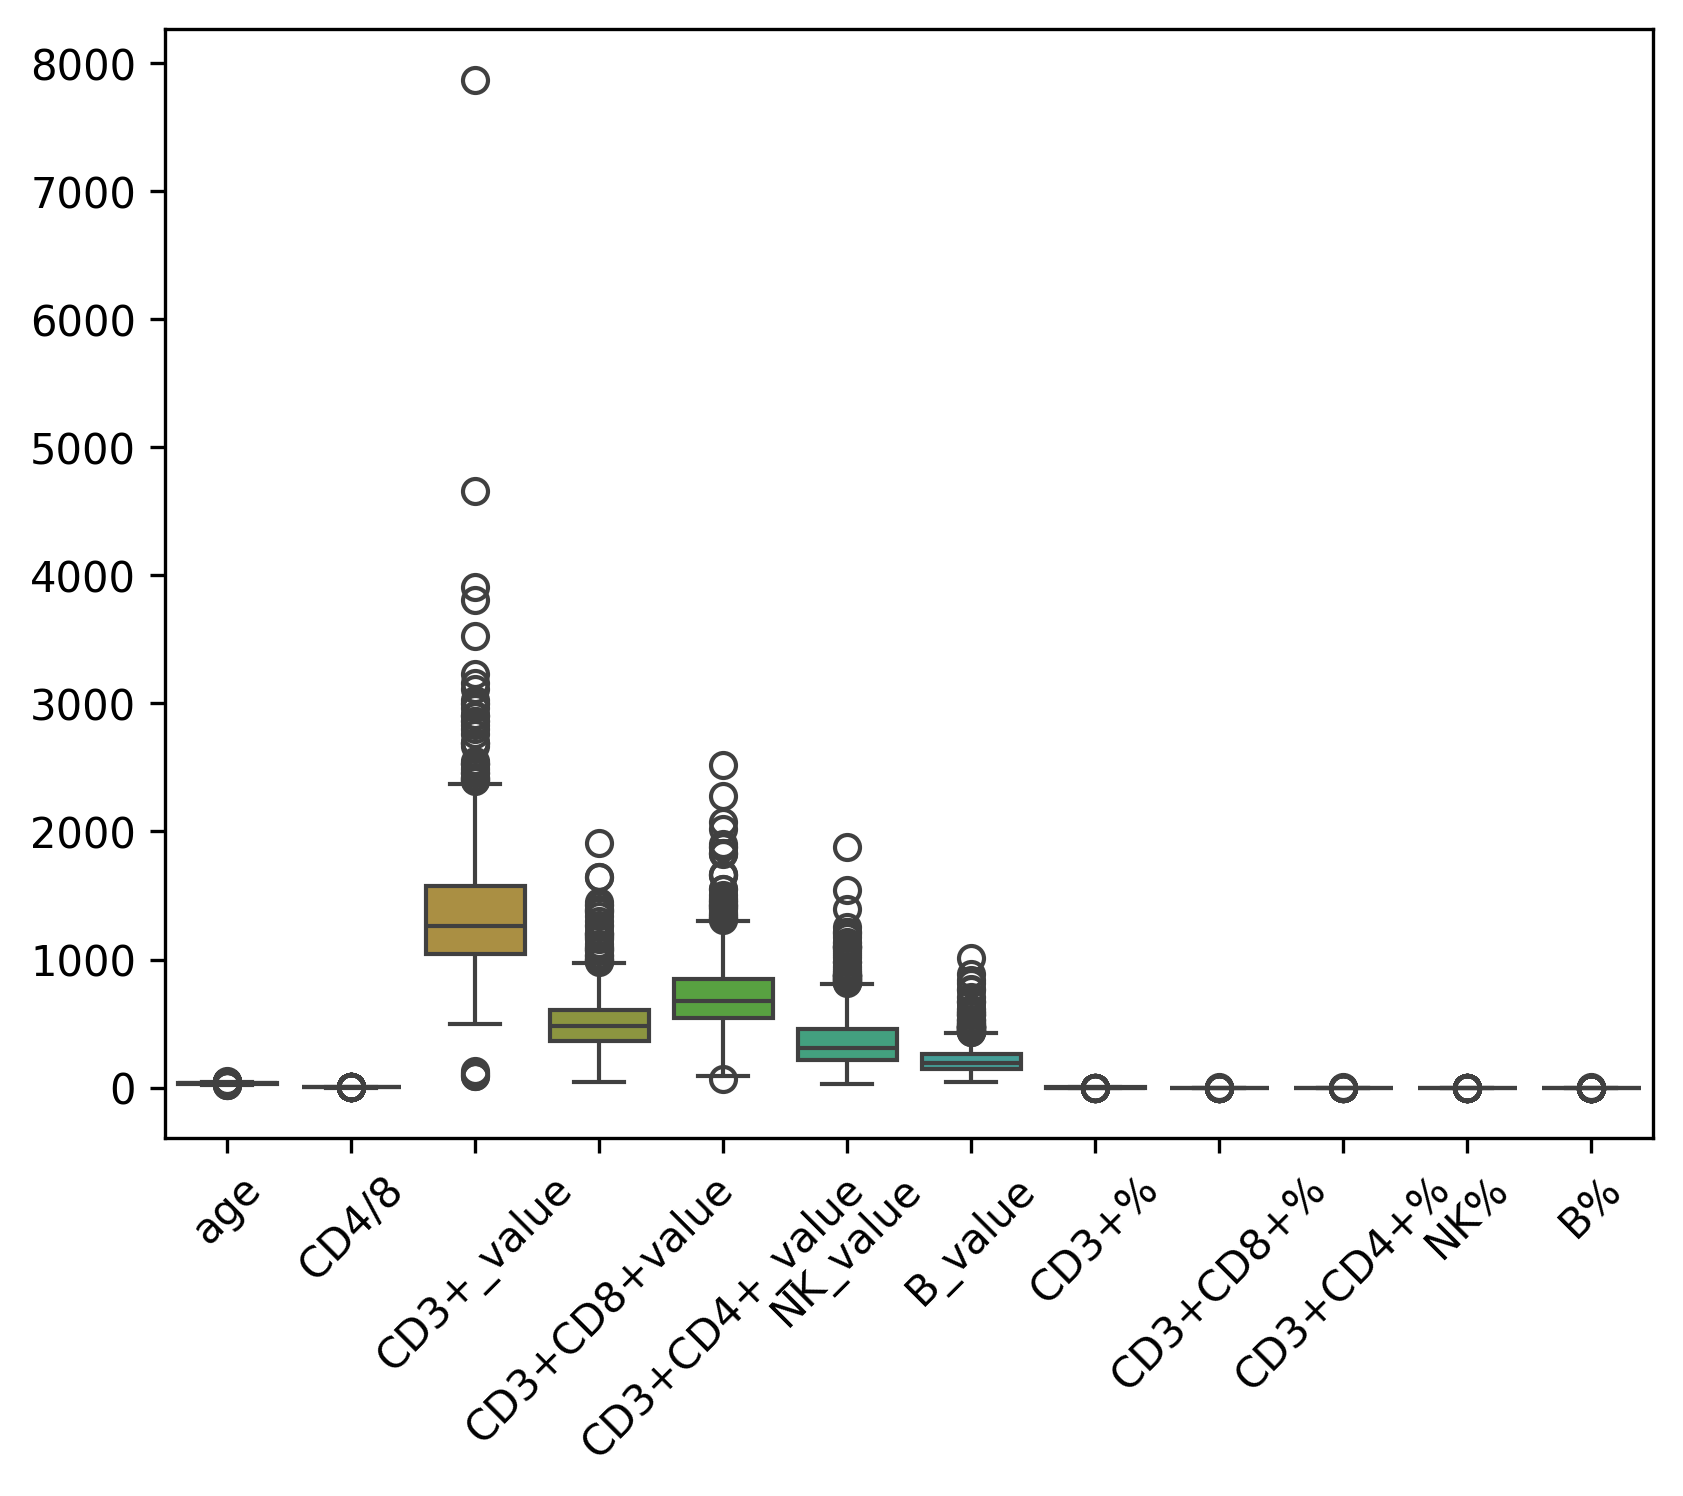

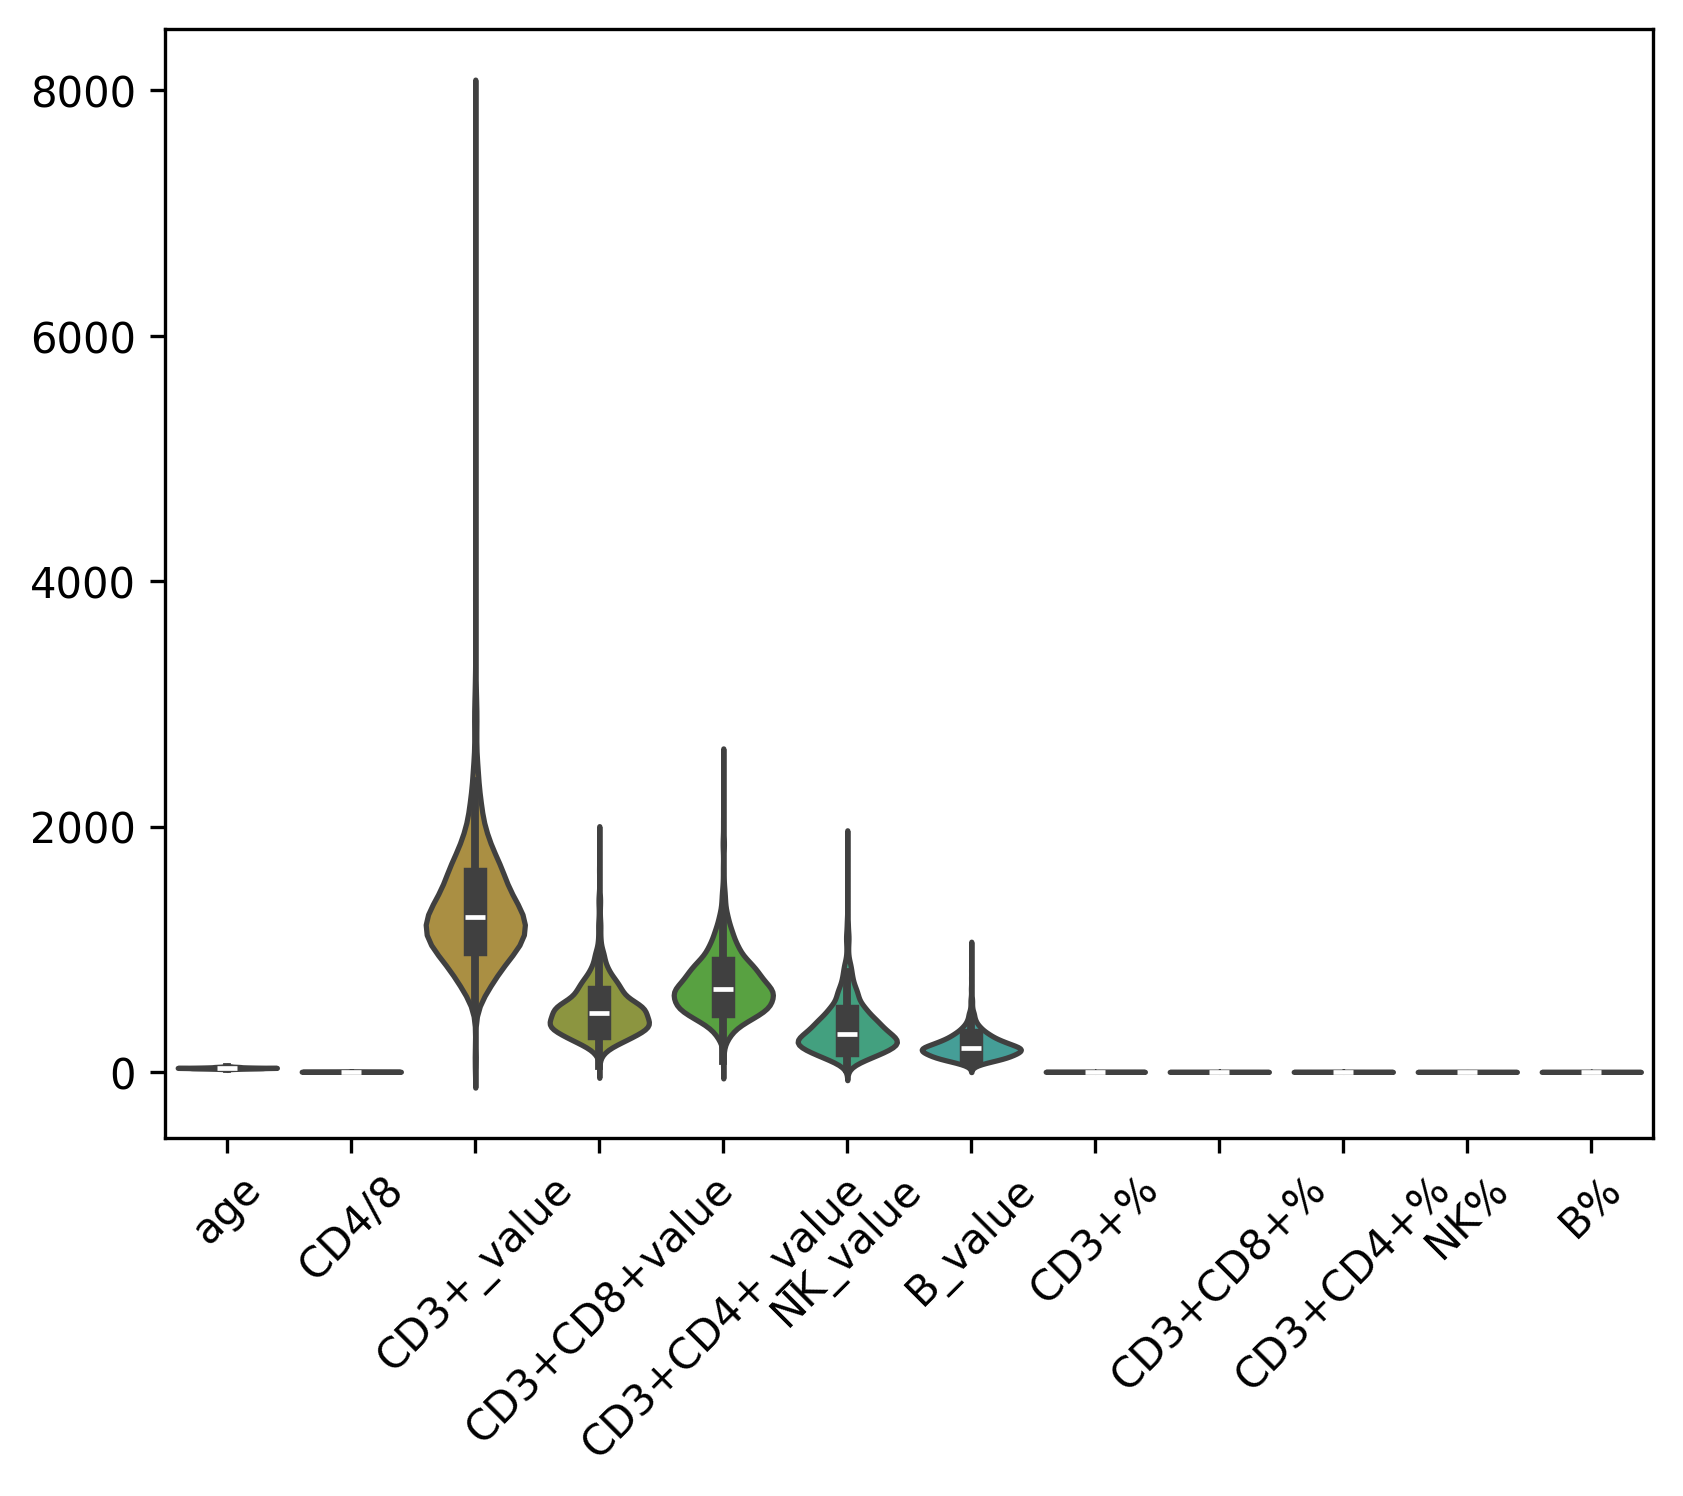

In [14]:
#绘制箱型图和小提琴图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=300)
sns.boxplot(PredictLose_Data)
plt.xticks(rotation=45)
plt.show()
plt.figure(dpi=300)
sns.violinplot(PredictLose_Data)
plt.xticks(rotation=45)
plt.show()

In [15]:
#利用箱型图原理检测和替换异常数据
for replace in PredictLose_Data.iloc[:,1:].columns:
    replace_data=PredictLose_Data.loc[:,replace]    #获取待检测数据
    # 计算四分位数和IQR
    Q1 = replace_data.quantile(0.25)
    Q3 = replace_data.quantile(0.75)
    IQR = Q3 - Q1
    # 定义异常值的阈值
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # 找出异常值并用中位数替换它们
    median =replace_data.median()
    PredictLose_Data.loc[(PredictLose_Data[replace] < lower_limit) | (PredictLose_Data[replace] > upper_limit),replace] = median

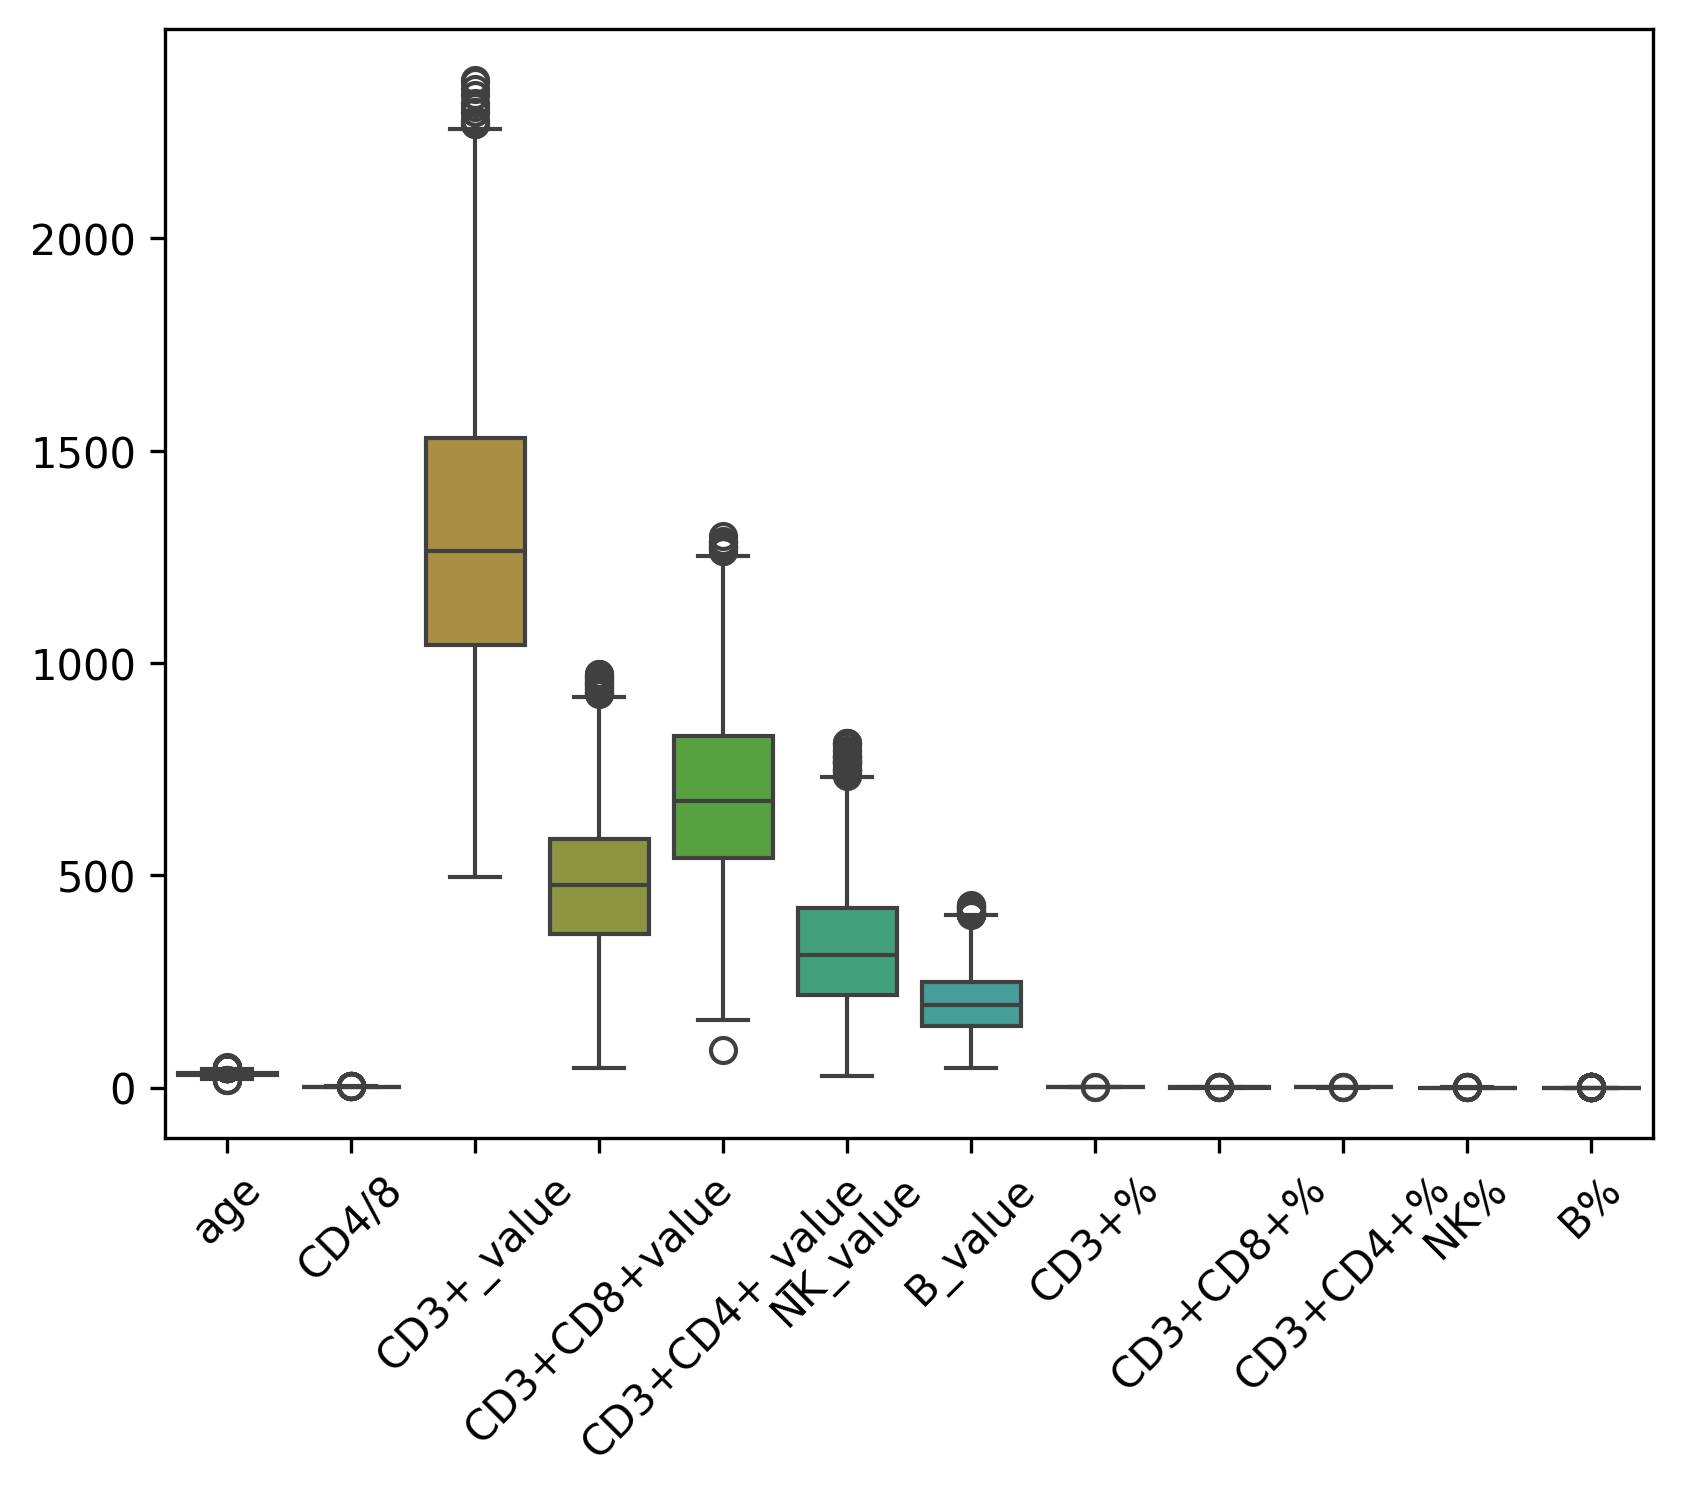

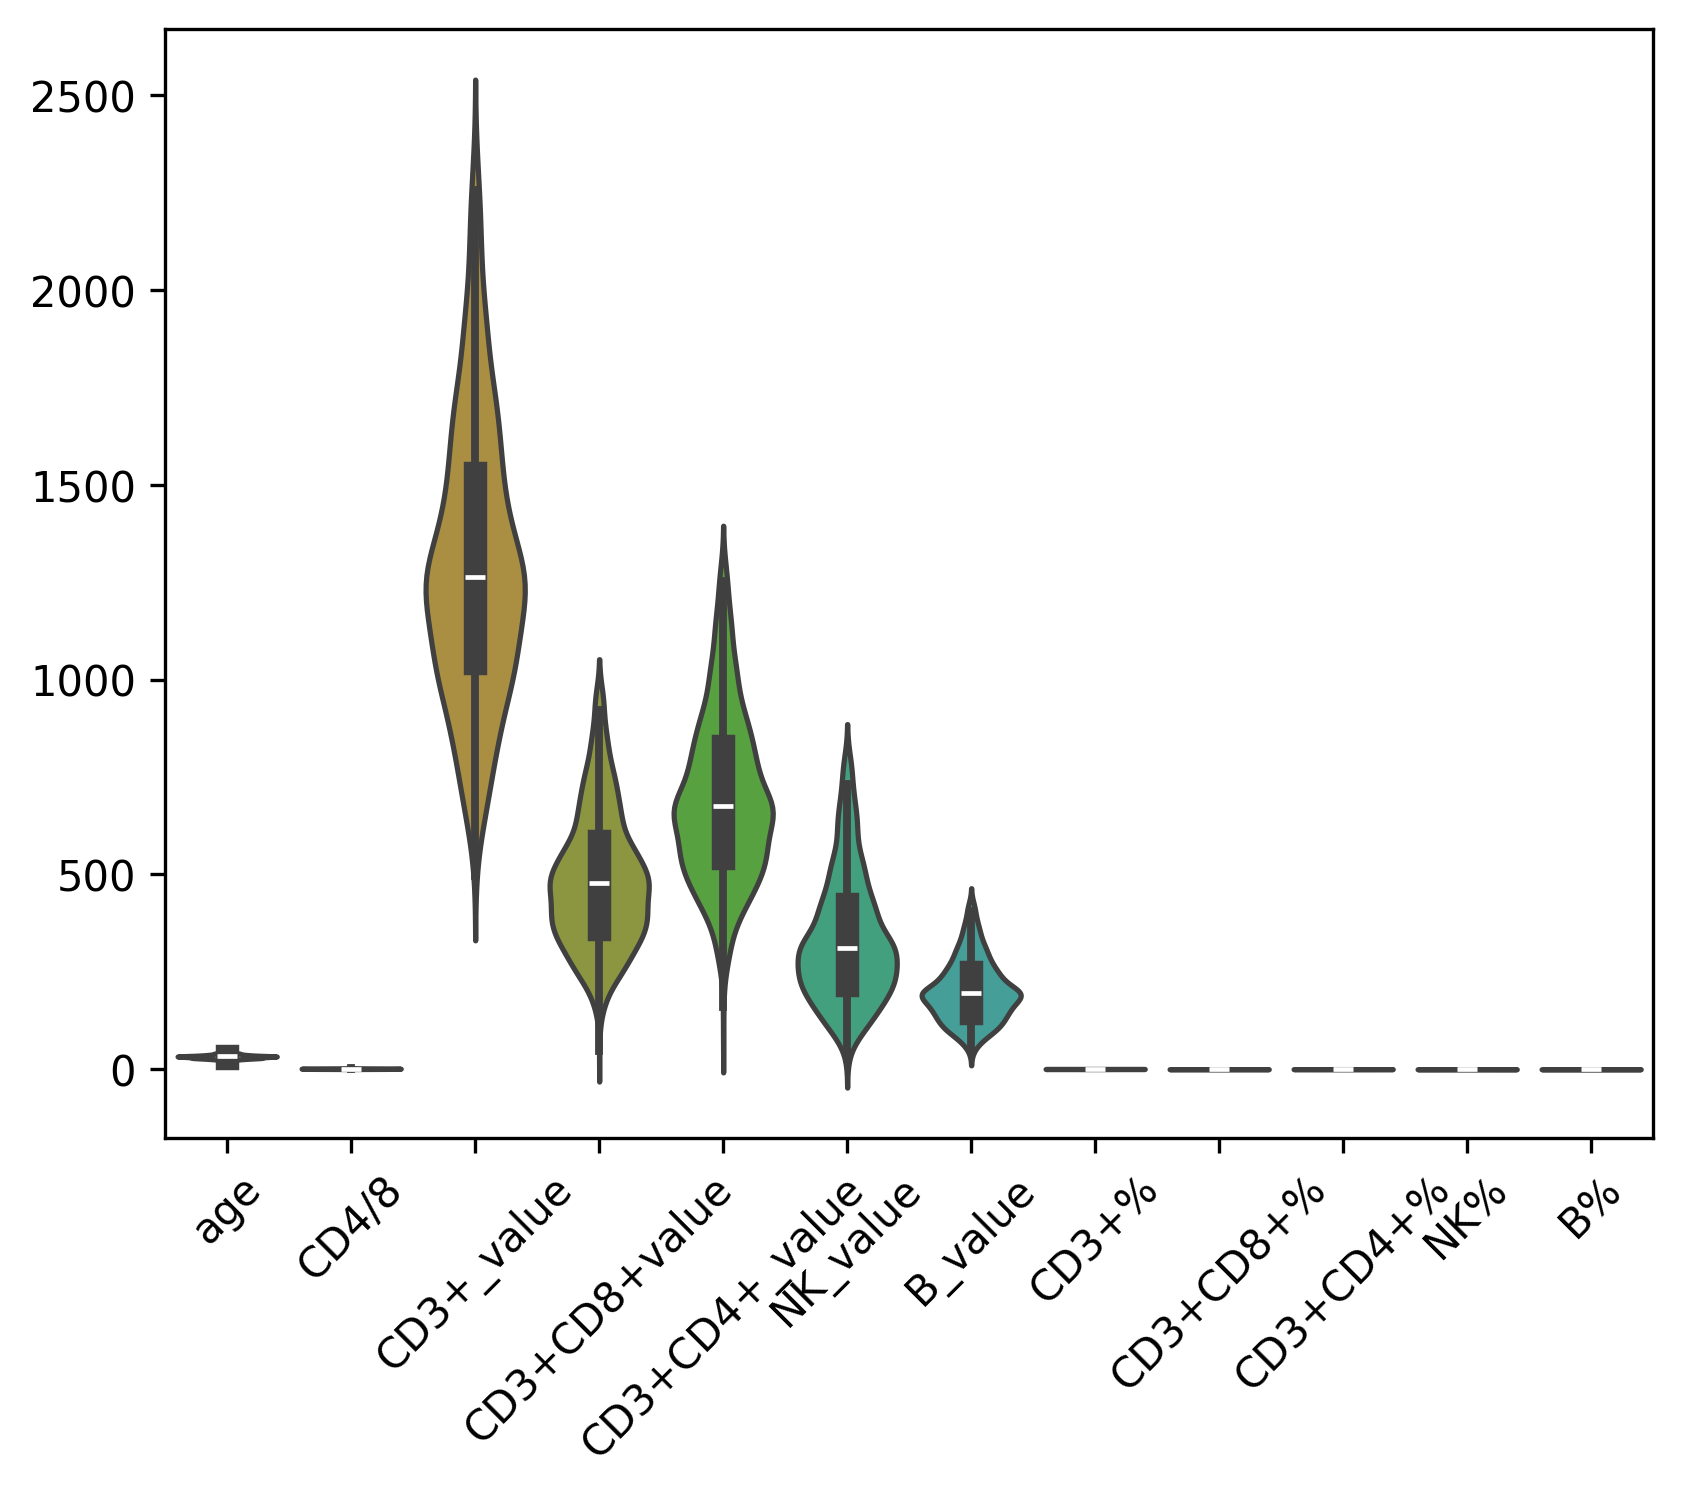

In [16]:
plt.figure(dpi=300)
sns.boxplot(PredictLose_Data)
plt.xticks(rotation=45)
plt.show()
plt.figure(dpi=300)
sns.violinplot(PredictLose_Data)
plt.xticks(rotation=45)
plt.show()

In [17]:
#标准化和缩放数据集
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stand=StandardScaler()    #初始化缩放器
PredictLose_DataStand=stand.fit_transform(PredictLose_Data)    #数据缩放
minmax=MinMaxScaler(feature_range=(0,1))    #设置归一化器
PredictLose_DataStandMinmax=minmax.fit_transform(PredictLose_DataStand)
PredictLose_value=DataFrame(PredictLose_DataStandMinmax)    #重构数据集
PredictLose_value.columns=PredictLose_Data.columns

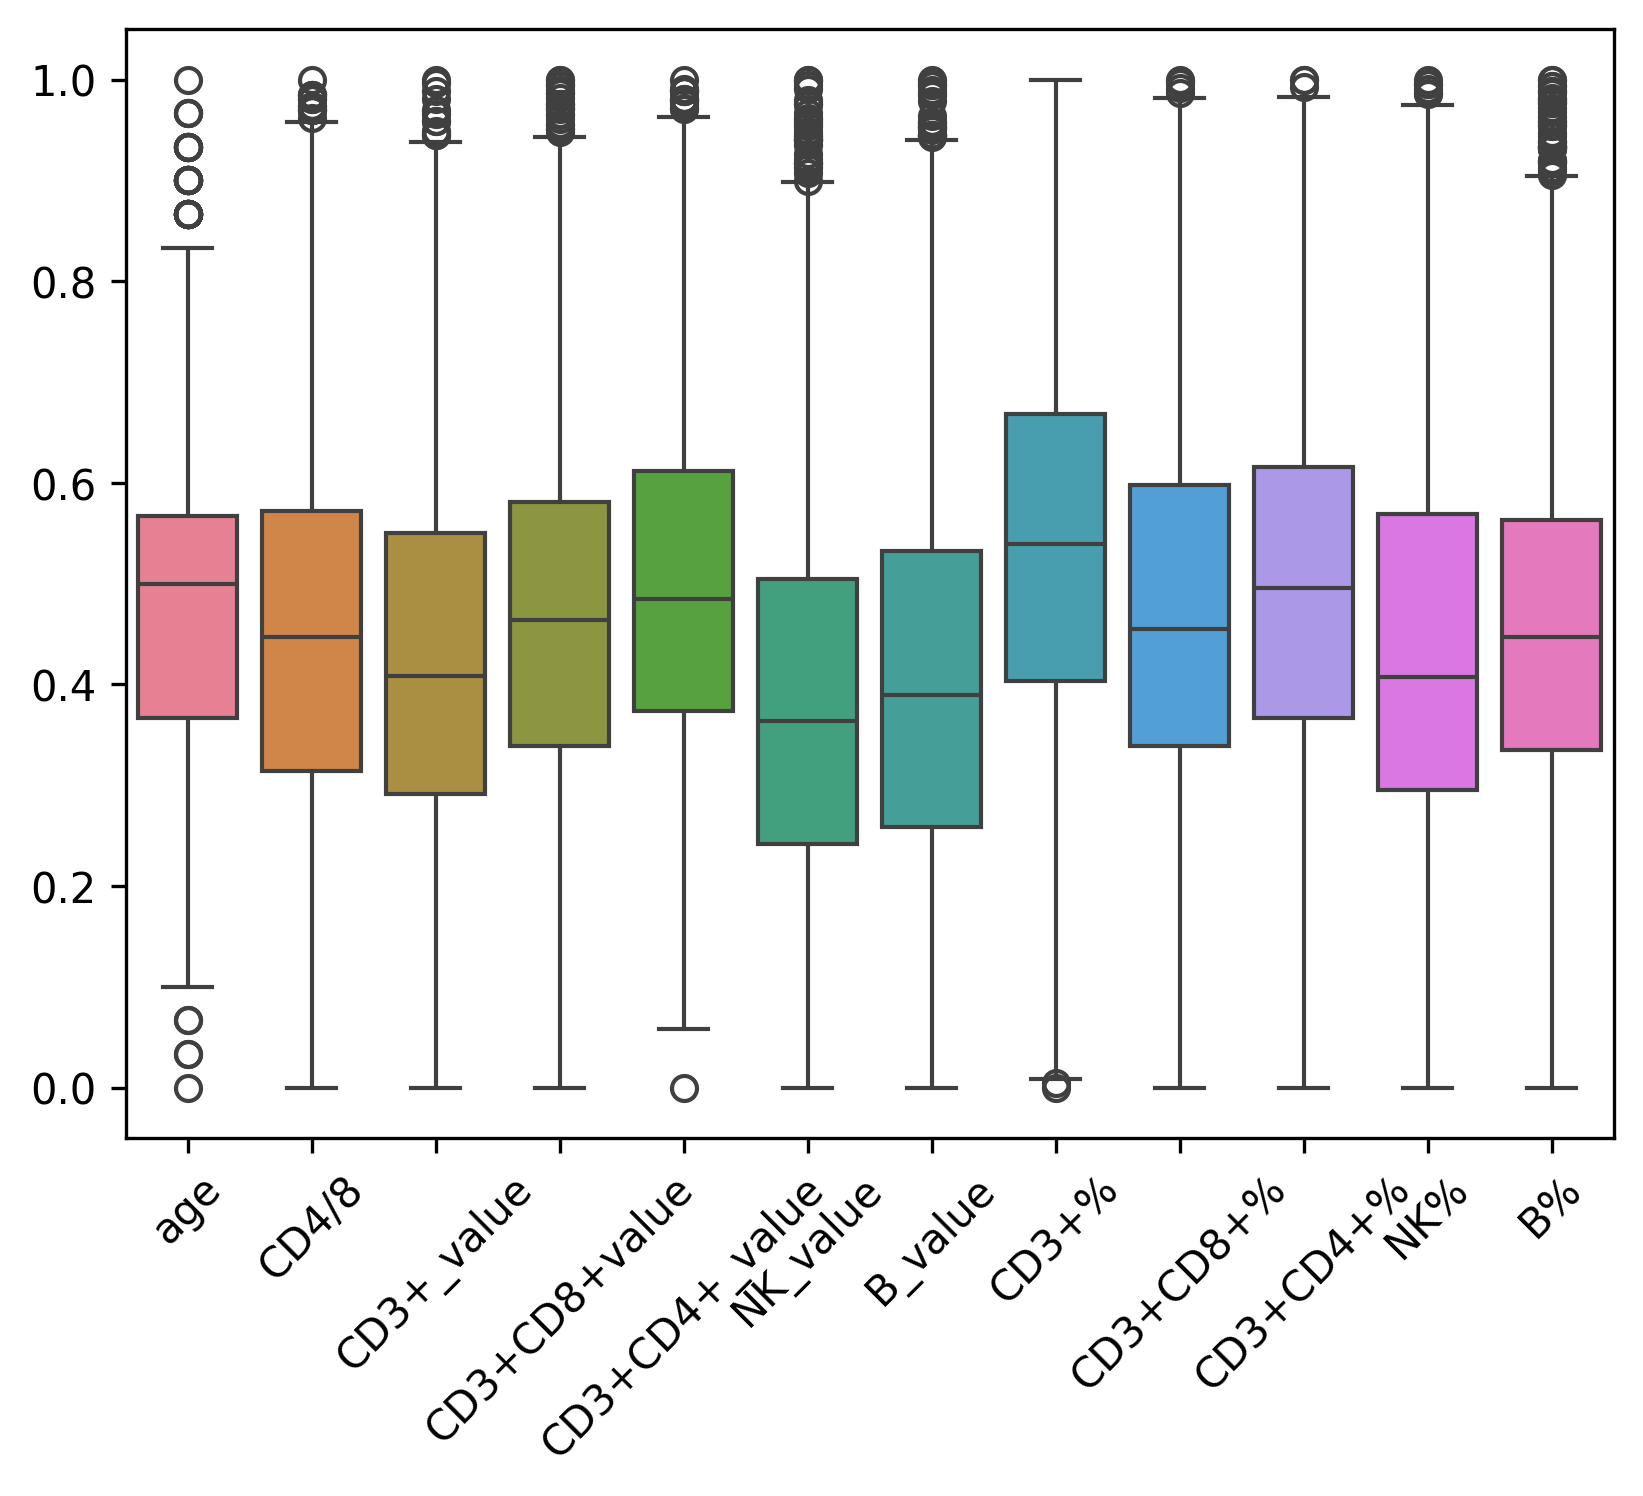

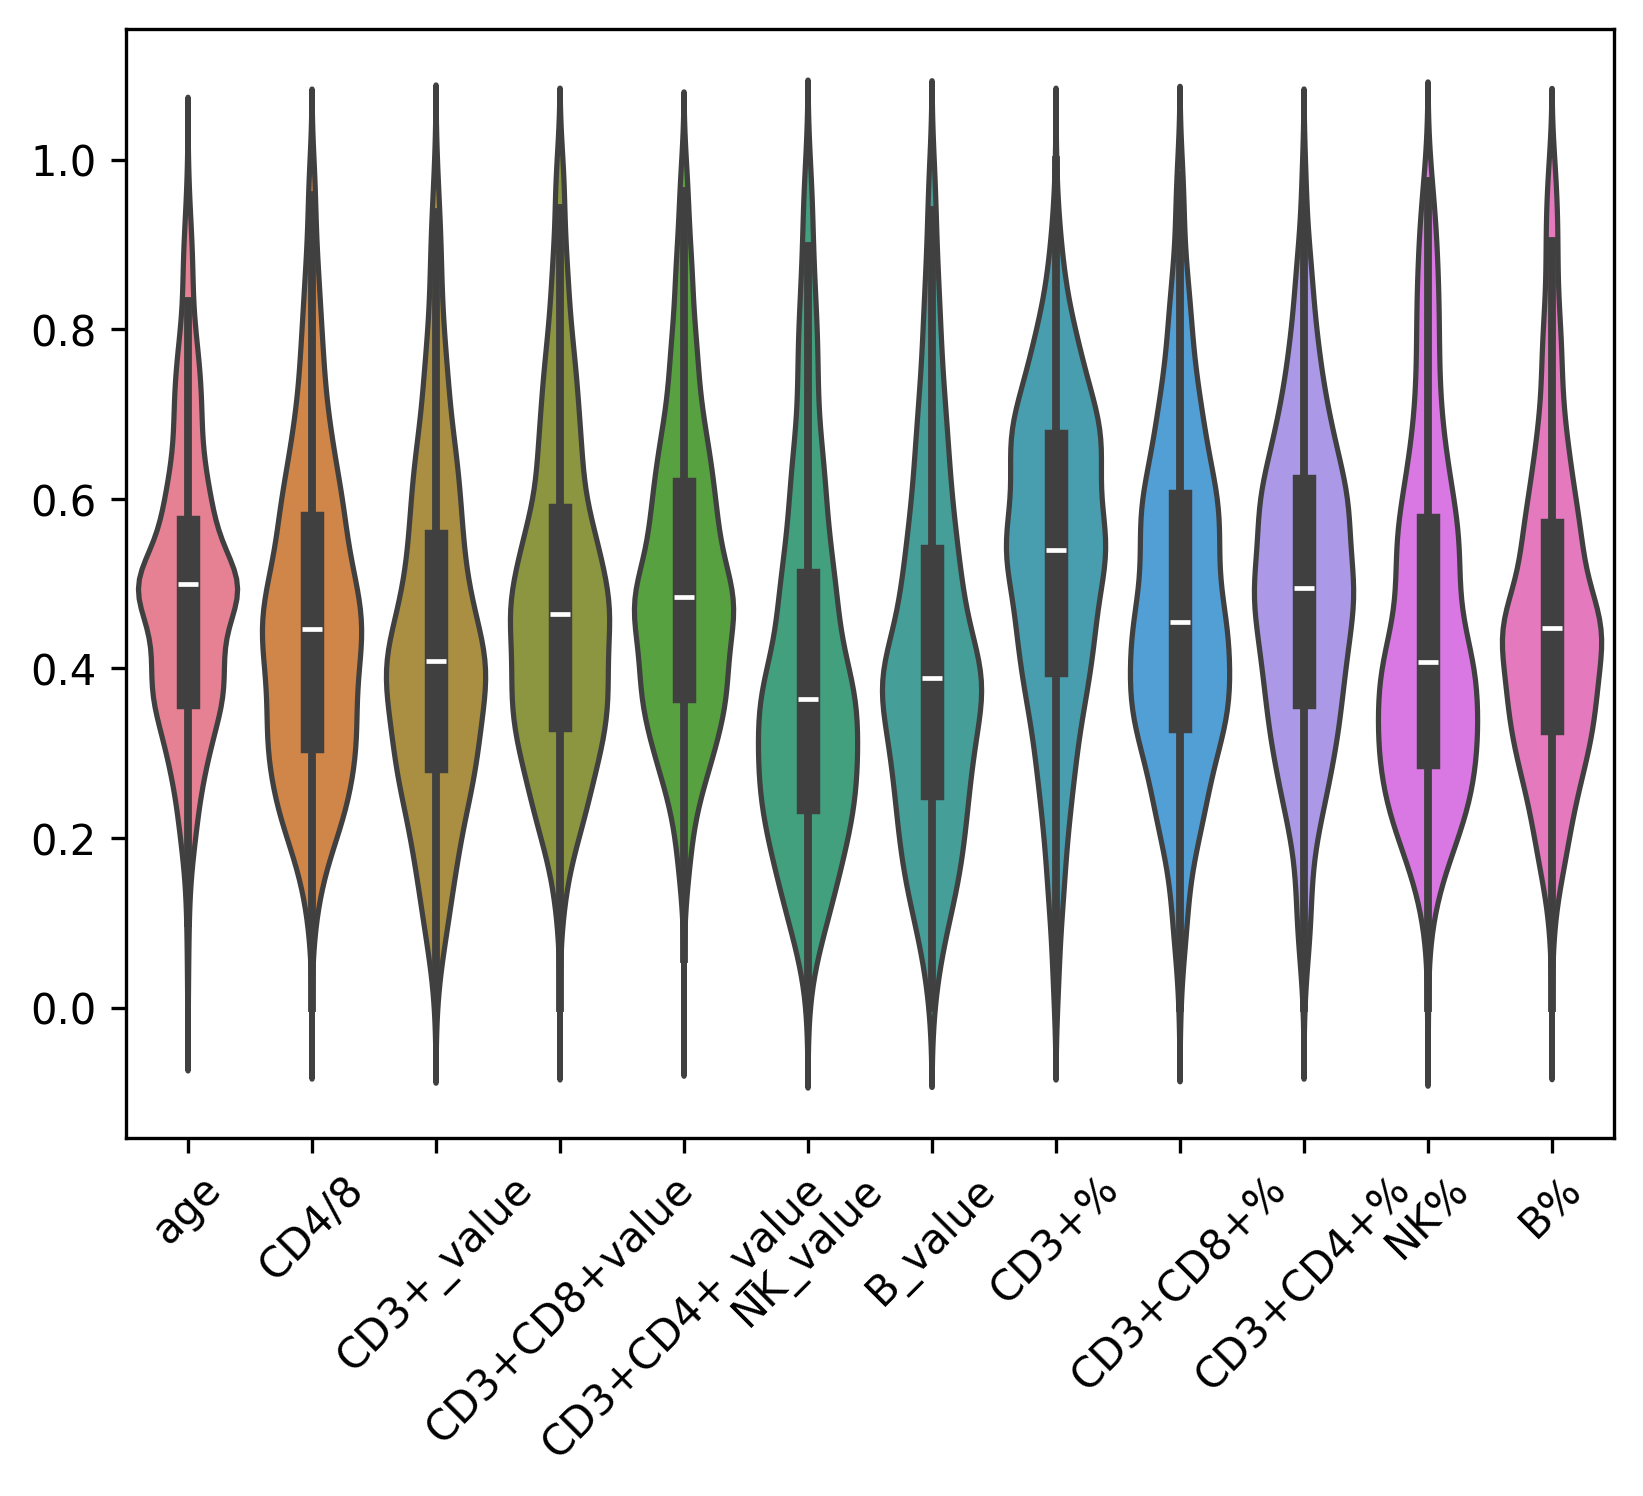

In [18]:
#绘制箱型图和小提琴图
plt.figure(dpi=300)
sns.boxplot(PredictLose_value)
plt.xticks(rotation=45)
plt.show()
plt.figure(dpi=300)
sns.violinplot(PredictLose_value)
plt.xticks(rotation=45)
plt.show()

In [19]:
#连接抗体数据
for anti in Data.iloc[:,35:]:
    PredictLose_value[anti]=Data.loc[:,anti]
PredictLose_value.head(10)

,age,CD4/8,CD3+_value,CD3+CD8+value,CD3+CD4+_value,NK_value,B_value,CD3+%,CD3+CD8+%,CD3+CD4+%,...,Anti_PA_Encoder,Anti_CPB_Encoder,Anti_SRP_Encoder,Anti_R52_Encoder,Anti_SS_Encoder,Anti_J1_Encoder,Anti_DA_Encoder,Anti_SM_Encoder,Anti_PM_Encoder,AnuA_Encoder
0,0.466667,0.253788,0.408631,0.463862,0.988420,0.268790,0.083551,1.000000,0.960249,0.590119,...,0,0,0,0.0,0,0,0,0,0,0
1,0.433333,0.340909,0.596697,0.668824,0.583127,0.042038,0.644909,0.809467,0.698606,0.572730,...,0,0,0,0.0,0,0,0,0,0,0
2,0.500000,0.397727,0.260522,0.374326,0.363110,0.815287,0.046997,0.222807,0.377336,0.311068,...,0,0,0,0.0,0,0,0,0,0,0
3,0.333333,0.367424,0.230687,0.338727,0.303557,0.290446,0.002611,0.653837,0.564224,0.482473,...,0,0,0,0.0,0,0,0,0,0,0
4,0.700000,0.397727,0.409164,0.503776,0.496278,0.751592,0.075718,0.395171,0.474340,0.434171,...,0,0,0,0.0,0,1,0,0,0,0
5,0.433333,0.314394,0.285562,0.441208,0.347395,0.327389,0.018277,0.653598,0.684663,0.488821,...,1,0,0,0.0,0,0,0,0,0,0
6,0.466667,0.367424,0.344166,0.486516,0.444996,0.434395,0.041775,0.585465,0.634530,0.561137,...,0,0,0,0.0,0,0,0,0,0,0
7,0.500000,0.284091,0.510922,0.588997,0.435070,0.536306,0.093995,0.600765,0.581430,0.316864,...,0,0,0,0.0,1,0,0,0,0,0
8,0.566667,0.477273,0.580181,0.563107,0.657568,0.071338,0.399478,0.869472,0.595669,0.761524,...,0,0,0,0.0,0,0,0,0,0,0
9,0.266667,0.310606,0.515717,0.639698,0.511166,0.868790,0.143603,0.389672,0.530406,0.320453,...,0,0,0,0.0,0,0,0,0,0,0


In [20]:
#切分数据集
from sklearn.model_selection import train_test_split
LoseData=Data.loc[:,'lose']
#构建深度学习数据集
DLData,DL_TestData,DLTarget,DL_TestTarget=train_test_split(PredictLose_value,LoseData,train_size=0.8,random_state=2024)
DL_TrainData=DLData[:932]    #获取训练数据
DL_TrainTarget=DLTarget[:932]
DL_ValidData=DLData[932:]    #获取验证数据
DL_ValidTarget=DLTarget[932:]
print('深度学习训练数据形状:{0},验证数据形状:{1},测试数据形状:{2}'.format(DL_TrainData.shape,DL_ValidData.shape,DL_TestData.shape))
print('深度学习训练数据标签形状:{0},验证数据标签形状:{1},测试数据标签形状:{2}'.format(DL_TrainTarget.shape,DL_ValidTarget.shape,DL_TestTarget.shape))

深度学习训练数据形状:(932, 34),验证数据形状:(311, 34),测试数据形状:(311, 34)
深度学习训练数据标签形状:(932,),验证数据标签形状:(311,),测试数据标签形状:(311,)


In [21]:
#提取抗体和检验数据
DLTrain_Inspection=DL_TrainData.iloc[:,:12]    #检验数据集-训练
DLTrain_Anti=DL_TrainData.iloc[:,12:]    #抗体数据集-训练
DLValid_Inspection=DL_ValidData.iloc[:,:12]    #检验数据集-验证
DLValid_Anti=DL_ValidData.iloc[:,12:]   #抗体数据集-验证
DLTest_Inspection=DL_TestData.iloc[:,:12]    #检验数据集-测试
DLTest_Anti=DL_TestData.iloc[:,12:]    #抗体数据集-测试

In [22]:
#填充空缺数据
DLTrain_Anti.fillna(0,inplace=True)
DLValid_Anti.fillna(0,inplace=True)
DLTest_Anti.fillna(0,inplace=True)

In [23]:
#重构数据形状
import numpy as np
DLTrain_Anti_Re=np.array(DLTrain_Anti).reshape(DLTrain_Anti.shape[0],DLTrain_Anti.shape[1],1)    #抗体数据
DLValid_Anti_Re=np.array(DLValid_Anti).reshape(DLValid_Anti.shape[0],DLValid_Anti.shape[1],1)
DLTest_Anti_Re=np.array(DLTest_Anti).reshape(DLTest_Anti.shape[0],DLTest_Anti.shape[1],1)
DLTrain_Inspection_Re=np.array(DLTrain_Inspection).reshape(DLTrain_Inspection.shape[0],DLTrain_Inspection.shape[1],1)    #检验数据
DLValid_Inspection_Re=np.array(DLValid_Inspection).reshape(DLValid_Inspection.shape[0],DLValid_Inspection.shape[1],1)
DLTest_Inspection_Re=np.array(DLTest_Inspection).reshape(DLTest_Inspection.shape[0],DLTest_Inspection.shape[1],1)

In [ ]:
#构建数据输入流
import tensorflow as tf
DL_TrainData_inspection=tf.data.Dataset.from_tensor_slices((DLTrain_Inspection)).repeat(10)    #构建检验训练数据流
DL_TrainData_inspection=DL_TrainData_inspection.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
DL_TrainData_Anti=tf.data.Dataset.from_tensor_slices((DLTrain_Anti)).repeat(10)    #构建抗体训练数据流
DL_TrainData_Anti=DL_TrainData_Anti.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
DL_TrainTarget_API=tf.data.Dataset.from_tensor_slices((DL_TrainTarget)).repeat(10)    #构建训练标签数据流
DL_TrainTarget_API=DL_TrainTarget_API.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
#构建验证数据流
DL_ValidData_inspection=tf.data.Dataset.from_tensor_slices((DLValid_Inspection)).repeat(10)    #构建检验数据流
DL_ValidData_inspection=DL_ValidData_inspection.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
DL_ValidData_Anti=tf.data.Dataset.from_tensor_slices((DLValid_Anti)).repeat(10)    #构建抗体验证数据流
DL_ValidData_Anti=DL_ValidData_Anti.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
DL_ValidTarget_API=tf.data.Dataset.from_tensor_slices((DL_ValidTarget)).repeat(10)    #构建验证标签数据流
DL_ValidTarget_API=DL_ValidTarget_API.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
#构建测试数据流
DL_TestData_inspection=tf.data.Dataset.from_tensor_slices((DLTest_Inspection)).repeat(10)    #构建检验测试数据流
DL_TestData_inspection=DL_TestData_inspection.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
DL_TestData_Anti=tf.data.Dataset.from_tensor_slices((DLTest_Anti)).repeat(10)    #构建抗体测试数据流
DL_TestData_Anti=DL_TestData_Anti.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
DL_TestTarget_API=tf.data.Dataset.from_tensor_slices((DL_TestTarget)).repeat(10)    #构建测试标签数据流
DL_TestTarget_API=DL_TestTarget_API.shuffle(buffer_size=1000,seed=2024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [24]:
#模型组网
from tensorflow import keras
InputLayer_inspection=keras.layers.Input(shape=[12,1],name='Inspection_input')
#卷积层-检验数据1
Inspection_Conv1D1_1=keras.layers.Conv1D(filters=24,kernel_size=3,padding='valid',activation='selu',strides=1,kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(InputLayer_inspection)
Inspection_Conv1D1_2=keras.layers.Conv1D(filters=24,kernel_size=3,padding='valid',activation='selu',strides=1,kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_Conv1D1_1)
Inspection_maxpool1=keras.layers.MaxPooling1D(pool_size=2,strides=1,padding='valid')(Inspection_Conv1D1_2)
#卷积层-检验数据
Inspection_Conv1D2_1=keras.layers.Conv1D(filters=48,kernel_size=3,padding='valid',activation='selu',strides=1,kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_maxpool1)
Inspection_Conv1D2_2=keras.layers.Conv1D(filters=48,kernel_size=3,padding='valid',activation='selu',strides=1,kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_Conv1D2_1)
Inspection_maxpool2=keras.layers.MaxPooling1D(pool_size=2,strides=1,padding='valid')(Inspection_Conv1D2_2)
Inspection_Flatten=keras.layers.Flatten()(Inspection_maxpool2)
#组合体1-检验数据
Inspection_Dense1_1=keras.layers.Dense(96,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_Flatten)
Inspection_Dense1_2=keras.layers.Dense(96,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_Dense1_1)
Inspection_Normal1=keras.layers.BatchNormalization()(Inspection_Dense1_2)
Inspection_Dropout1=keras.layers.Dropout(rate=0.5)(Inspection_Normal1)
#组合体2-检验数据
Inspection_Dense2_1=keras.layers.Dense(192,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_Dropout1)
Inspection_Dense2_2=keras.layers.Dense(192,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Inspection_Dense2_1)
Inspection_Normal2=keras.layers.BatchNormalization()(Inspection_Dense2_2)
#构建抗体数据输入
InputLayer_Anti=keras.layers.Input(shape=[22,1],name='Anti_input')
Anti_Embedding=keras.layers.Embedding(2,22)(InputLayer_Anti)
#组合体1-抗体数据
Anti_Dense1_1=keras.layers.Dense(22,activation='sigmoid',kernel_initializer='glorot_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Embedding)
Anti_Dense1_2=keras.layers.Dense(24,activation='sigmoid',kernel_initializer='glorot_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dense1_1)
Anti_Normal1=keras.layers.BatchNormalization()(Anti_Dense1_2)
Anti_Dropout1=keras.layers.Dropout(rate=0.5)(Anti_Normal1)
#组合体2-抗体数据
Anti_Dense2_1=keras.layers.Dense(36,activation='sigmoid',kernel_initializer='glorot_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dropout1)
Anti_Dense2_2=keras.layers.Dense(36,activation='sigmoid',kernel_initializer='glorot_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dense2_1)
Anti_Normal2=keras.layers.BatchNormalization()(Anti_Dense2_2)
Anti_Dropout2=keras.layers.Dropout(rate=0.5)(Anti_Normal2)
#组合体3-抗体数据
Anti_Dense3_1=keras.layers.Dense(48,activation='sigmoid',kernel_initializer='glorot_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dropout2)
Anti_Dense3_2=keras.layers.Dense(48,activation='sigmoid',kernel_initializer='glorot_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dense3_1)
Anti_Normal3=keras.layers.BatchNormalization()(Anti_Dense3_2)
Anti_Dropout3=keras.layers.Dropout(rate=0.5)(Anti_Normal3)
#组合体4-抗体数据
Anti_Dense4_1=keras.layers.Dense(60,activation='sigmoid',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dropout3)
Anti_Dense4_2=keras.layers.Dense(60,activation='sigmoid',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Anti_Dense4_1)
Inspection_Reshape=keras.layers.Reshape((-1,))(Anti_Dense4_2)
#数据合并层
Content_layer=keras.layers.Concatenate()([Inspection_Normal2,Inspection_Reshape])
#残差模块1
Res_Dense1_1=keras.layers.Dense(120,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Content_layer)
Res_Dropout1=keras.layers.Dropout(rate=0.5)(Res_Dense1_1)
Res_Dense1_2=keras.layers.Dense(60,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dropout1)
Res_Dense1_3=keras.layers.Dense(1512,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dense1_2)
Res_Add1=keras.layers.Add()([Res_Dense1_3,Content_layer])
Res_Normal1=keras.layers.Normalization()(Res_Add1)
#残差模块2
Res_Dense2_1=keras.layers.Dnse(120,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Normal1)
Res_Dropout2=keras.layers.Dropout(rate=0.5)(Res_Dense2_1)
Res_Dense2_2=keras.layers.Dense(60,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dropout2)
Res_Dense2_3=keras.layers.Dense(1512,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dense2_2)
Res_Add2=keras.layers.Add()([Res_Dense2_3,Res_Normal1])
Res_Normal2=keras.layers.Normalization()(Res_Add2)
#残差模块3
Res_Dense3_1=keras.layers.Dense(120,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Normal2)
Res_Dropout3=keras.layers.Dropout(rate=0.5)(Res_Dense3_1)
Res_Dense3_2=keras.layers.Dense(40,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dropout3)
Res_Dense3_3=keras.layers.Dense(1512,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dense3_2)
Res_Add3=keras.layers.Add()([Res_Dense3_3,Res_Normal2])
Res_Normal3=keras.layers.Normalization()(Res_Add3)
#残差模块4
Res_Dense4_1=keras.layers.Dense(120,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Normal3)
Res_Dropout4=keras.layers.Dropout(rate=0.5)(Res_Dense4_1)
Res_Dense4_2=keras.layers.Dense(30,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dropout4)
Res_Dense4_3=keras.layers.Dense(1512,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Dense4_2)
Res_Add4=keras.layers.Add()([Res_Dense4_3,Res_Normal3])
Res_Normal4=keras.layers.Normalization()(Res_Add4)
#前馈网络
Hidden_Layer1=keras.layers.Dense(60,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Res_Normal4)
Hidden_dropout1=keras.layers.Dropout(rate=0.5)(Hidden_Layer1)
Hidden_Layer2=keras.layers.Dense(40,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))((Hidden_dropout1))
Hidden_Normal=keras.layers.Normalization()(Hidden_Layer2)
Hidden_dropout2=keras.layers.Dropout(rate=0.5)(Hidden_Normal)
Hidden_Layer3=keras.layers.Dense(30,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Hidden_dropout2)
Hidden_Layer4=keras.layers.Dense(10,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=keras.regularizers.l1_l2(0.01,0.01),
                   kernel_constraint=keras.constraints.max_norm(1))(Hidden_Layer3)
Output_layer=keras.layers.Dense(1,name='Output_layer')(Hidden_Layer4)    #输出层
AntiAndInspection=keras.Model(inputs=[InputLayer_inspection,InputLayer_Anti],outputs=[Output_layer])    #模型组网
AntiAndInspection.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Anti_input (InputLayer)        [(None, 22, 1)]      0           []                               
                                                                                                  
 embedding (Embedding)          (None, 22, 1, 22)    44          ['Anti_input[0][0]']             
                                                                                                  
 Inspection_input (InputLayer)  [(None, 12, 1)]      0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 22, 1, 22)    506         ['embedding[0][0]']              
                                                                                              

In [25]:
#检测GPU可用性
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [26]:
#编译及训练
Train_epoch=500
lr_scheduler=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=100)    #学习率性能调度
CheckPoint_model=keras.callbacks.ModelCheckpoint('AntiAndInspection',save_best_only=True)    #设置检查点
EarlyStopping_model=keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)    #设置提前停止
AntiAndInspection.compile(loss='mae',optimizer=keras.optimizers.Adam(learning_rate=0.0001,clipnorm=1.0),metrics='mae')    #模型编译
TrainHistory=AntiAndInspection.fit(x={'Inspection_input':DLTrain_Inspection_Re,'Anti_input':DLTrain_Anti_Re},
                                   y=DL_TrainTarget,epochs=Train_epoch,batch_size=32,
                                   validation_data=({'Inspection_input':DLValid_Inspection_Re,'Anti_input':DLValid_Anti_Re},[DL_ValidTarget]),
                                  callbacks=[lr_scheduler,CheckPoint_model,EarlyStopping_model])

Epoch 1/500


2024-06-14 17:21:16.263150: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - ETA: 0s - loss: 669.4150 - mae: 2.1160

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 34s 464ms/step - loss: 669.4150 - mae: 2.1160 - val_loss: 659.1340 - val_mae: 0.9870 - lr: 1.0000e-04
Epoch 2/500
29/30 [============================>.] - ETA: 0s - loss: 650.7609 - mae: 1.4550

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 650.7173 - mae: 1.4558 - val_loss: 639.2848 - val_mae: 0.9878 - lr: 1.0000e-04
Epoch 3/500
29/30 [============================>.] - ETA: 0s - loss: 629.2856 - mae: 1.3204

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 407ms/step - loss: 629.2343 - mae: 1.3187 - val_loss: 616.4315 - val_mae: 0.8013 - lr: 1.0000e-04
Epoch 4/500
29/30 [============================>.] - ETA: 0s - loss: 605.2315 - mae: 1.1771

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 605.1764 - mae: 1.1768 - val_loss: 591.1236 - val_mae: 0.6452 - lr: 1.0000e-04
Epoch 5/500
29/30 [============================>.] - ETA: 0s - loss: 579.8479 - mae: 1.1098

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 409ms/step - loss: 579.7964 - mae: 1.1134 - val_loss: 565.7540 - val_mae: 0.6624 - lr: 1.0000e-04
Epoch 6/500
29/30 [============================>.] - ETA: 0s - loss: 554.3024 - mae: 1.0284

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 554.2465 - mae: 1.0276 - val_loss: 540.3601 - val_mae: 0.7842 - lr: 1.0000e-04
Epoch 7/500
29/30 [============================>.] - ETA: 0s - loss: 528.7195 - mae: 0.9731

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 528.6665 - mae: 0.9731 - val_loss: 515.2498 - val_mae: 0.6389 - lr: 1.0000e-04
Epoch 8/500
29/30 [============================>.] - ETA: 0s - loss: 504.3539 - mae: 0.9075

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 504.3027 - mae: 0.9083 - val_loss: 491.2224 - val_mae: 0.7015 - lr: 1.0000e-04
Epoch 9/500
29/30 [============================>.] - ETA: 0s - loss: 480.4304 - mae: 0.8795

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 480.3802 - mae: 0.8790 - val_loss: 467.9314 - val_mae: 0.7200 - lr: 1.0000e-04
Epoch 10/500
29/30 [============================>.] - ETA: 0s - loss: 457.3847 - mae: 0.8252

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 457.3326 - mae: 0.8223 - val_loss: 445.0968 - val_mae: 0.7232 - lr: 1.0000e-04
Epoch 11/500
29/30 [============================>.] - ETA: 0s - loss: 434.7675 - mae: 0.7862

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 434.7197 - mae: 0.7856 - val_loss: 422.9359 - val_mae: 0.6421 - lr: 1.0000e-04
Epoch 12/500
29/30 [============================>.] - ETA: 0s - loss: 413.4066 - mae: 0.7954

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 413.3627 - mae: 0.7953 - val_loss: 402.4488 - val_mae: 0.6951 - lr: 1.0000e-04
Epoch 13/500
29/30 [============================>.] - ETA: 0s - loss: 393.3686 - mae: 0.7447

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 393.3265 - mae: 0.7441 - val_loss: 383.0084 - val_mae: 0.6410 - lr: 1.0000e-04
Epoch 14/500
29/30 [============================>.] - ETA: 0s - loss: 374.5726 - mae: 0.7334

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 406ms/step - loss: 374.5354 - mae: 0.7350 - val_loss: 364.8570 - val_mae: 0.6359 - lr: 1.0000e-04
Epoch 15/500
29/30 [============================>.] - ETA: 0s - loss: 356.9135 - mae: 0.7229

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 356.8749 - mae: 0.7203 - val_loss: 347.9170 - val_mae: 0.6350 - lr: 1.0000e-04
Epoch 16/500
29/30 [============================>.] - ETA: 0s - loss: 340.5394 - mae: 0.7062

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 404ms/step - loss: 340.5054 - mae: 0.7060 - val_loss: 332.1260 - val_mae: 0.6374 - lr: 1.0000e-04
Epoch 17/500
29/30 [============================>.] - ETA: 0s - loss: 325.1743 - mae: 0.6918

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 325.1413 - mae: 0.6905 - val_loss: 317.2988 - val_mae: 0.6597 - lr: 1.0000e-04
Epoch 18/500
29/30 [============================>.] - ETA: 0s - loss: 310.7705 - mae: 0.6829

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 310.7404 - mae: 0.6824 - val_loss: 303.4200 - val_mae: 0.6560 - lr: 1.0000e-04
Epoch 19/500
30/30 [==============================] - ETA: 0s - loss: 297.2553 - mae: 0.6588

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 297.2553 - mae: 0.6588 - val_loss: 290.4915 - val_mae: 0.6758 - lr: 1.0000e-04
Epoch 20/500
29/30 [============================>.] - ETA: 0s - loss: 284.7855 - mae: 0.6709

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 404ms/step - loss: 284.7583 - mae: 0.6694 - val_loss: 278.4164 - val_mae: 0.6706 - lr: 1.0000e-04
Epoch 21/500
29/30 [============================>.] - ETA: 0s - loss: 273.0688 - mae: 0.6631

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 273.0425 - mae: 0.6609 - val_loss: 267.1182 - val_mae: 0.6836 - lr: 1.0000e-04
Epoch 22/500
29/30 [============================>.] - ETA: 0s - loss: 262.0772 - mae: 0.6590

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 407ms/step - loss: 262.0565 - mae: 0.6609 - val_loss: 256.4984 - val_mae: 0.6730 - lr: 1.0000e-04
Epoch 23/500
29/30 [============================>.] - ETA: 0s - loss: 251.7290 - mae: 0.6362

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 251.7103 - mae: 0.6390 - val_loss: 246.4547 - val_mae: 0.6675 - lr: 1.0000e-04
Epoch 24/500
29/30 [============================>.] - ETA: 0s - loss: 241.9476 - mae: 0.6521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 241.9258 - mae: 0.6507 - val_loss: 236.9040 - val_mae: 0.6607 - lr: 1.0000e-04
Epoch 25/500
29/30 [============================>.] - ETA: 0s - loss: 232.5892 - mae: 0.6352

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 232.5686 - mae: 0.6342 - val_loss: 227.8013 - val_mae: 0.6698 - lr: 1.0000e-04
Epoch 26/500
29/30 [============================>.] - ETA: 0s - loss: 223.6571 - mae: 0.6388

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 223.6381 - mae: 0.6384 - val_loss: 219.0300 - val_mae: 0.6458 - lr: 1.0000e-04
Epoch 27/500
29/30 [============================>.] - ETA: 0s - loss: 215.0633 - mae: 0.6331

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 430ms/step - loss: 215.0464 - mae: 0.6342 - val_loss: 210.6203 - val_mae: 0.6506 - lr: 1.0000e-04
Epoch 28/500
29/30 [============================>.] - ETA: 0s - loss: 206.7876 - mae: 0.6332

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 206.7691 - mae: 0.6320 - val_loss: 202.5009 - val_mae: 0.6505 - lr: 1.0000e-04
Epoch 29/500
29/30 [============================>.] - ETA: 0s - loss: 198.8089 - mae: 0.6379

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 433ms/step - loss: 198.7931 - mae: 0.6388 - val_loss: 194.6760 - val_mae: 0.6613 - lr: 1.0000e-04
Epoch 30/500
29/30 [============================>.] - ETA: 0s - loss: 191.0993 - mae: 0.6366

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 430ms/step - loss: 191.0829 - mae: 0.6364 - val_loss: 187.1107 - val_mae: 0.6600 - lr: 1.0000e-04
Epoch 31/500
29/30 [============================>.] - ETA: 0s - loss: 183.6486 - mae: 0.6282

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 437ms/step - loss: 183.6335 - mae: 0.6287 - val_loss: 179.8039 - val_mae: 0.6599 - lr: 1.0000e-04
Epoch 32/500
29/30 [============================>.] - ETA: 0s - loss: 176.4539 - mae: 0.6304

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 431ms/step - loss: 176.4417 - mae: 0.6333 - val_loss: 172.7371 - val_mae: 0.6638 - lr: 1.0000e-04
Epoch 33/500
29/30 [============================>.] - ETA: 0s - loss: 169.4959 - mae: 0.6331

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 437ms/step - loss: 169.4808 - mae: 0.6326 - val_loss: 165.9184 - val_mae: 0.6806 - lr: 1.0000e-04
Epoch 34/500
29/30 [============================>.] - ETA: 0s - loss: 162.7456 - mae: 0.6285

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 429ms/step - loss: 162.7311 - mae: 0.6281 - val_loss: 159.2699 - val_mae: 0.6577 - lr: 1.0000e-04
Epoch 35/500
29/30 [============================>.] - ETA: 0s - loss: 156.2226 - mae: 0.6282

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 425ms/step - loss: 156.2070 - mae: 0.6263 - val_loss: 152.8582 - val_mae: 0.6588 - lr: 1.0000e-04
Epoch 36/500
29/30 [============================>.] - ETA: 0s - loss: 149.9109 - mae: 0.6255

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 149.8958 - mae: 0.6237 - val_loss: 146.6307 - val_mae: 0.6377 - lr: 1.0000e-04
Epoch 37/500
29/30 [============================>.] - ETA: 0s - loss: 143.8092 - mae: 0.6276

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 143.7969 - mae: 0.6281 - val_loss: 140.6797 - val_mae: 0.6685 - lr: 1.0000e-04
Epoch 38/500
29/30 [============================>.] - ETA: 0s - loss: 137.9039 - mae: 0.6229

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 137.8932 - mae: 0.6247 - val_loss: 134.8378 - val_mae: 0.6417 - lr: 1.0000e-04
Epoch 39/500
29/30 [============================>.] - ETA: 0s - loss: 132.1957 - mae: 0.6195

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 430ms/step - loss: 132.1873 - mae: 0.6231 - val_loss: 129.2438 - val_mae: 0.6404 - lr: 1.0000e-04
Epoch 40/500
29/30 [============================>.] - ETA: 0s - loss: 126.6854 - mae: 0.6207

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 126.6723 - mae: 0.6192 - val_loss: 123.8360 - val_mae: 0.6372 - lr: 1.0000e-04
Epoch 41/500
29/30 [============================>.] - ETA: 0s - loss: 121.3593 - mae: 0.6204

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 430ms/step - loss: 121.3490 - mae: 0.6213 - val_loss: 118.6080 - val_mae: 0.6435 - lr: 1.0000e-04
Epoch 42/500
29/30 [============================>.] - ETA: 0s - loss: 116.2202 - mae: 0.6296

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 116.2083 - mae: 0.6286 - val_loss: 113.5536 - val_mae: 0.6447 - lr: 1.0000e-04
Epoch 43/500
29/30 [============================>.] - ETA: 0s - loss: 111.2362 - mae: 0.6147

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 434ms/step - loss: 111.2267 - mae: 0.6155 - val_loss: 108.6810 - val_mae: 0.6403 - lr: 1.0000e-04
Epoch 44/500
29/30 [============================>.] - ETA: 0s - loss: 106.4426 - mae: 0.6157

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 425ms/step - loss: 106.4302 - mae: 0.6133 - val_loss: 103.9668 - val_mae: 0.6357 - lr: 1.0000e-04
Epoch 45/500
29/30 [============================>.] - ETA: 0s - loss: 101.8177 - mae: 0.6206

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 433ms/step - loss: 101.8078 - mae: 0.6204 - val_loss: 99.4193 - val_mae: 0.6304 - lr: 1.0000e-04
Epoch 46/500
29/30 [============================>.] - ETA: 0s - loss: 97.3511 - mae: 0.6208

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 97.3423 - mae: 0.6214 - val_loss: 95.0458 - val_mae: 0.6364 - lr: 1.0000e-04
Epoch 47/500
29/30 [============================>.] - ETA: 0s - loss: 93.0345 - mae: 0.6118

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 431ms/step - loss: 93.0247 - mae: 0.6110 - val_loss: 90.8199 - val_mae: 0.6335 - lr: 1.0000e-04
Epoch 48/500
29/30 [============================>.] - ETA: 0s - loss: 88.8896 - mae: 0.6142

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 88.8817 - mae: 0.6150 - val_loss: 86.7697 - val_mae: 0.6466 - lr: 1.0000e-04
Epoch 49/500
29/30 [============================>.] - ETA: 0s - loss: 84.8983 - mae: 0.6160

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 430ms/step - loss: 84.8886 - mae: 0.6147 - val_loss: 82.8472 - val_mae: 0.6370 - lr: 1.0000e-04
Epoch 50/500
29/30 [============================>.] - ETA: 0s - loss: 81.0433 - mae: 0.6067

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 81.0339 - mae: 0.6053 - val_loss: 79.1248 - val_mae: 0.6826 - lr: 1.0000e-04
Epoch 51/500
29/30 [============================>.] - ETA: 0s - loss: 77.3397 - mae: 0.6084

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 77.3322 - mae: 0.6087 - val_loss: 75.4564 - val_mae: 0.6493 - lr: 1.0000e-04
Epoch 52/500
29/30 [============================>.] - ETA: 0s - loss: 73.7764 - mae: 0.6125

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 73.7688 - mae: 0.6124 - val_loss: 71.9448 - val_mae: 0.6346 - lr: 1.0000e-04
Epoch 53/500
29/30 [============================>.] - ETA: 0s - loss: 70.3417 - mae: 0.6106

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 429ms/step - loss: 70.3352 - mae: 0.6113 - val_loss: 68.5926 - val_mae: 0.6429 - lr: 1.0000e-04
Epoch 54/500
29/30 [============================>.] - ETA: 0s - loss: 67.0354 - mae: 0.6081

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 67.0264 - mae: 0.6060 - val_loss: 65.3475 - val_mae: 0.6356 - lr: 1.0000e-04
Epoch 55/500
29/30 [============================>.] - ETA: 0s - loss: 63.8540 - mae: 0.6024

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 63.8483 - mae: 0.6033 - val_loss: 62.2311 - val_mae: 0.6278 - lr: 1.0000e-04
Epoch 56/500
29/30 [============================>.] - ETA: 0s - loss: 60.8038 - mae: 0.6042

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 60.7952 - mae: 0.6019 - val_loss: 59.2406 - val_mae: 0.6266 - lr: 1.0000e-04
Epoch 57/500
29/30 [============================>.] - ETA: 0s - loss: 57.8654 - mae: 0.6024

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 57.8579 - mae: 0.6011 - val_loss: 56.3730 - val_mae: 0.6294 - lr: 1.0000e-04
Epoch 58/500
29/30 [============================>.] - ETA: 0s - loss: 55.0454 - mae: 0.5966

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 55.0445 - mae: 0.6015 - val_loss: 53.6425 - val_mae: 0.6499 - lr: 1.0000e-04
Epoch 59/500
29/30 [============================>.] - ETA: 0s - loss: 52.3478 - mae: 0.5996

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 430ms/step - loss: 52.3409 - mae: 0.5984 - val_loss: 50.9858 - val_mae: 0.6369 - lr: 1.0000e-04
Epoch 60/500
29/30 [============================>.] - ETA: 0s - loss: 49.7546 - mae: 0.5964

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 49.7507 - mae: 0.5979 - val_loss: 48.4623 - val_mae: 0.6467 - lr: 1.0000e-04
Epoch 61/500
29/30 [============================>.] - ETA: 0s - loss: 47.2657 - mae: 0.5973

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 434ms/step - loss: 47.2593 - mae: 0.5961 - val_loss: 46.0121 - val_mae: 0.6298 - lr: 1.0000e-04
Epoch 62/500
29/30 [============================>.] - ETA: 0s - loss: 44.8784 - mae: 0.5948

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 44.8741 - mae: 0.5956 - val_loss: 43.6813 - val_mae: 0.6342 - lr: 1.0000e-04
Epoch 63/500
29/30 [============================>.] - ETA: 0s - loss: 42.5841 - mae: 0.5918

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 42.5791 - mae: 0.5915 - val_loss: 41.4347 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 64/500
29/30 [============================>.] - ETA: 0s - loss: 40.3948 - mae: 0.5913

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 40.3892 - mae: 0.5903 - val_loss: 39.3066 - val_mae: 0.6310 - lr: 1.0000e-04
Epoch 65/500
29/30 [============================>.] - ETA: 0s - loss: 38.3048 - mae: 0.5943

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 429ms/step - loss: 38.2982 - mae: 0.5921 - val_loss: 37.2599 - val_mae: 0.6368 - lr: 1.0000e-04
Epoch 66/500
29/30 [============================>.] - ETA: 0s - loss: 36.2874 - mae: 0.5910

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 36.2819 - mae: 0.5897 - val_loss: 35.2918 - val_mae: 0.6327 - lr: 1.0000e-04
Epoch 67/500
29/30 [============================>.] - ETA: 0s - loss: 34.3687 - mae: 0.5912

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 429ms/step - loss: 34.3635 - mae: 0.5901 - val_loss: 33.4152 - val_mae: 0.6282 - lr: 1.0000e-04
Epoch 68/500
29/30 [============================>.] - ETA: 0s - loss: 32.5302 - mae: 0.5876

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 32.5283 - mae: 0.5895 - val_loss: 31.6262 - val_mae: 0.6294 - lr: 1.0000e-04
Epoch 69/500
29/30 [============================>.] - ETA: 0s - loss: 30.7762 - mae: 0.5860

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 433ms/step - loss: 30.7733 - mae: 0.5868 - val_loss: 29.9122 - val_mae: 0.6264 - lr: 1.0000e-04
Epoch 70/500
29/30 [============================>.] - ETA: 0s - loss: 29.1080 - mae: 0.5867

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 29.1031 - mae: 0.5853 - val_loss: 28.3022 - val_mae: 0.6361 - lr: 1.0000e-04
Epoch 71/500
29/30 [============================>.] - ETA: 0s - loss: 27.5150 - mae: 0.5840

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 27.5116 - mae: 0.5839 - val_loss: 26.7335 - val_mae: 0.6261 - lr: 1.0000e-04
Epoch 72/500
29/30 [============================>.] - ETA: 0s - loss: 25.9913 - mae: 0.5821

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 25.9872 - mae: 0.5812 - val_loss: 25.2515 - val_mae: 0.6256 - lr: 1.0000e-04
Epoch 73/500
29/30 [============================>.] - ETA: 0s - loss: 24.5436 - mae: 0.5801

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 433ms/step - loss: 24.5413 - mae: 0.5809 - val_loss: 23.8523 - val_mae: 0.6317 - lr: 1.0000e-04
Epoch 74/500
29/30 [============================>.] - ETA: 0s - loss: 23.1728 - mae: 0.5846

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 23.1687 - mae: 0.5833 - val_loss: 22.5089 - val_mae: 0.6289 - lr: 1.0000e-04
Epoch 75/500
29/30 [============================>.] - ETA: 0s - loss: 21.8592 - mae: 0.5818

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 21.8552 - mae: 0.5804 - val_loss: 21.2303 - val_mae: 0.6281 - lr: 1.0000e-04
Epoch 76/500
29/30 [============================>.] - ETA: 0s - loss: 20.6145 - mae: 0.5824

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 20.6107 - mae: 0.5812 - val_loss: 20.0225 - val_mae: 0.6263 - lr: 1.0000e-04
Epoch 77/500
29/30 [============================>.] - ETA: 0s - loss: 19.4346 - mae: 0.5835

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 429ms/step - loss: 19.4298 - mae: 0.5811 - val_loss: 18.8682 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 78/500
29/30 [============================>.] - ETA: 0s - loss: 18.3070 - mae: 0.5799

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 18.3045 - mae: 0.5798 - val_loss: 17.7799 - val_mae: 0.6272 - lr: 1.0000e-04
Epoch 79/500
29/30 [============================>.] - ETA: 0s - loss: 17.2401 - mae: 0.5781

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 434ms/step - loss: 17.2377 - mae: 0.5780 - val_loss: 16.7414 - val_mae: 0.6285 - lr: 1.0000e-04
Epoch 80/500
29/30 [============================>.] - ETA: 0s - loss: 16.2265 - mae: 0.5777

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 16.2231 - mae: 0.5764 - val_loss: 15.7536 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 81/500
29/30 [============================>.] - ETA: 0s - loss: 15.2662 - mae: 0.5770

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 430ms/step - loss: 15.2629 - mae: 0.5757 - val_loss: 14.8283 - val_mae: 0.6317 - lr: 1.0000e-04
Epoch 82/500
29/30 [============================>.] - ETA: 0s - loss: 14.3543 - mae: 0.5746

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 14.3535 - mae: 0.5756 - val_loss: 13.9421 - val_mae: 0.6285 - lr: 1.0000e-04
Epoch 83/500
29/30 [============================>.] - ETA: 0s - loss: 13.4912 - mae: 0.5725

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 13.4914 - mae: 0.5744 - val_loss: 13.1067 - val_mae: 0.6288 - lr: 1.0000e-04
Epoch 84/500
29/30 [============================>.] - ETA: 0s - loss: 12.6749 - mae: 0.5699

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 12.6772 - mae: 0.5739 - val_loss: 12.3147 - val_mae: 0.6260 - lr: 1.0000e-04
Epoch 85/500
29/30 [============================>.] - ETA: 0s - loss: 11.9093 - mae: 0.5733

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 11.9074 - mae: 0.5730 - val_loss: 11.5693 - val_mae: 0.6275 - lr: 1.0000e-04
Epoch 86/500
29/30 [============================>.] - ETA: 0s - loss: 11.1852 - mae: 0.5758

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 11.1813 - mae: 0.5735 - val_loss: 10.8643 - val_mae: 0.6265 - lr: 1.0000e-04
Epoch 87/500
29/30 [============================>.] - ETA: 0s - loss: 10.4981 - mae: 0.5734

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 10.4953 - mae: 0.5721 - val_loss: 10.2080 - val_mae: 0.6328 - lr: 1.0000e-04
Epoch 88/500
29/30 [============================>.] - ETA: 0s - loss: 9.8518 - mae: 0.5712

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 9.8503 - mae: 0.5710 - val_loss: 9.5795 - val_mae: 0.6279 - lr: 1.0000e-04
Epoch 89/500
29/30 [============================>.] - ETA: 0s - loss: 9.2460 - mae: 0.5714

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 9.2433 - mae: 0.5700 - val_loss: 8.9930 - val_mae: 0.6266 - lr: 1.0000e-04
Epoch 90/500
29/30 [============================>.] - ETA: 0s - loss: 8.6751 - mae: 0.5686

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 8.6748 - mae: 0.5695 - val_loss: 8.4444 - val_mae: 0.6273 - lr: 1.0000e-04
Epoch 91/500
29/30 [============================>.] - ETA: 0s - loss: 8.1444 - mae: 0.5711

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 8.1420 - mae: 0.5699 - val_loss: 7.9289 - val_mae: 0.6279 - lr: 1.0000e-04
Epoch 92/500
29/30 [============================>.] - ETA: 0s - loss: 7.6438 - mae: 0.5713

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 7.6415 - mae: 0.5700 - val_loss: 7.4476 - val_mae: 0.6298 - lr: 1.0000e-04
Epoch 93/500
29/30 [============================>.] - ETA: 0s - loss: 7.1757 - mae: 0.5718

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 7.1724 - mae: 0.5694 - val_loss: 6.9985 - val_mae: 0.6331 - lr: 1.0000e-04
Epoch 94/500
29/30 [============================>.] - ETA: 0s - loss: 6.7358 - mae: 0.5709

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 6.7325 - mae: 0.5685 - val_loss: 6.5714 - val_mae: 0.6297 - lr: 1.0000e-04
Epoch 95/500
29/30 [============================>.] - ETA: 0s - loss: 6.3240 - mae: 0.5692

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 6.3207 - mae: 0.5668 - val_loss: 6.1750 - val_mae: 0.6281 - lr: 1.0000e-04
Epoch 96/500
29/30 [============================>.] - ETA: 0s - loss: 5.9420 - mae: 0.5689

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 5.9399 - mae: 0.5676 - val_loss: 5.8081 - val_mae: 0.6291 - lr: 1.0000e-04
Epoch 97/500
29/30 [============================>.] - ETA: 0s - loss: 5.5835 - mae: 0.5671

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 5.5825 - mae: 0.5669 - val_loss: 5.4621 - val_mae: 0.6267 - lr: 1.0000e-04
Epoch 98/500
29/30 [============================>.] - ETA: 0s - loss: 5.2485 - mae: 0.5644

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 5.2499 - mae: 0.5664 - val_loss: 5.1488 - val_mae: 0.6332 - lr: 1.0000e-04
Epoch 99/500
29/30 [============================>.] - ETA: 0s - loss: 4.9388 - mae: 0.5635

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 4.9401 - mae: 0.5655 - val_loss: 4.8479 - val_mae: 0.6287 - lr: 1.0000e-04
Epoch 100/500
29/30 [============================>.] - ETA: 0s - loss: 4.6552 - mae: 0.5655

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 408ms/step - loss: 4.6554 - mae: 0.5663 - val_loss: 4.5732 - val_mae: 0.6281 - lr: 1.0000e-04
Epoch 101/500
29/30 [============================>.] - ETA: 0s - loss: 4.3890 - mae: 0.5642

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 4.3883 - mae: 0.5640 - val_loss: 4.3174 - val_mae: 0.6268 - lr: 1.0000e-04
Epoch 102/500
29/30 [============================>.] - ETA: 0s - loss: 4.1446 - mae: 0.5661

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 4.1427 - mae: 0.5648 - val_loss: 4.0809 - val_mae: 0.6281 - lr: 1.0000e-04
Epoch 103/500
29/30 [============================>.] - ETA: 0s - loss: 3.9113 - mae: 0.5636

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 3.9116 - mae: 0.5644 - val_loss: 3.8584 - val_mae: 0.6284 - lr: 1.0000e-04
Epoch 104/500
29/30 [============================>.] - ETA: 0s - loss: 3.6987 - mae: 0.5670

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 3.6960 - mae: 0.5646 - val_loss: 3.6515 - val_mae: 0.6300 - lr: 1.0000e-04
Epoch 105/500
29/30 [============================>.] - ETA: 0s - loss: 3.4924 - mae: 0.5635

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 3.4928 - mae: 0.5643 - val_loss: 3.4550 - val_mae: 0.6298 - lr: 1.0000e-04
Epoch 106/500
29/30 [============================>.] - ETA: 0s - loss: 3.3016 - mae: 0.5633

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 3.3010 - mae: 0.5631 - val_loss: 3.2716 - val_mae: 0.6308 - lr: 1.0000e-04
Epoch 107/500
29/30 [============================>.] - ETA: 0s - loss: 3.1227 - mae: 0.5636

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 3.1210 - mae: 0.5623 - val_loss: 3.0969 - val_mae: 0.6294 - lr: 1.0000e-04
Epoch 108/500
29/30 [============================>.] - ETA: 0s - loss: 2.9548 - mae: 0.5639

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 2.9533 - mae: 0.5627 - val_loss: 2.9346 - val_mae: 0.6291 - lr: 1.0000e-04
Epoch 109/500
29/30 [============================>.] - ETA: 0s - loss: 2.7971 - mae: 0.5630

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 2.7966 - mae: 0.5628 - val_loss: 2.7838 - val_mae: 0.6295 - lr: 1.0000e-04
Epoch 110/500
29/30 [============================>.] - ETA: 0s - loss: 2.6488 - mae: 0.5611

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 2.6494 - mae: 0.5619 - val_loss: 2.6440 - val_mae: 0.6307 - lr: 1.0000e-04
Epoch 111/500
29/30 [============================>.] - ETA: 0s - loss: 2.5104 - mae: 0.5592

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 2.5131 - mae: 0.5622 - val_loss: 2.5079 - val_mae: 0.6262 - lr: 1.0000e-04
Epoch 112/500
29/30 [============================>.] - ETA: 0s - loss: 2.3861 - mae: 0.5622

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 2.3857 - mae: 0.5620 - val_loss: 2.3879 - val_mae: 0.6289 - lr: 1.0000e-04
Epoch 113/500
29/30 [============================>.] - ETA: 0s - loss: 2.2656 - mae: 0.5603

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 2.2651 - mae: 0.5601 - val_loss: 2.2740 - val_mae: 0.6290 - lr: 1.0000e-04
Epoch 114/500
29/30 [============================>.] - ETA: 0s - loss: 2.1570 - mae: 0.5622

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 2.1555 - mae: 0.5609 - val_loss: 2.1666 - val_mae: 0.6278 - lr: 1.0000e-04
Epoch 115/500
29/30 [============================>.] - ETA: 0s - loss: 2.0532 - mae: 0.5609

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 2.0518 - mae: 0.5596 - val_loss: 2.0678 - val_mae: 0.6277 - lr: 1.0000e-04
Epoch 116/500
29/30 [============================>.] - ETA: 0s - loss: 1.9583 - mae: 0.5612

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 1.9568 - mae: 0.5599 - val_loss: 1.9788 - val_mae: 0.6294 - lr: 1.0000e-04
Epoch 117/500
29/30 [============================>.] - ETA: 0s - loss: 1.8663 - mae: 0.5567

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 1.8691 - mae: 0.5596 - val_loss: 1.8912 - val_mae: 0.6265 - lr: 1.0000e-04
Epoch 118/500
29/30 [============================>.] - ETA: 0s - loss: 1.7855 - mae: 0.5572

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 1.7873 - mae: 0.5592 - val_loss: 1.8147 - val_mae: 0.6274 - lr: 1.0000e-04
Epoch 119/500
29/30 [============================>.] - ETA: 0s - loss: 1.7154 - mae: 0.5620

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 1.7129 - mae: 0.5597 - val_loss: 1.7460 - val_mae: 0.6306 - lr: 1.0000e-04
Epoch 120/500
29/30 [============================>.] - ETA: 0s - loss: 1.6446 - mae: 0.5609

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 1.6421 - mae: 0.5586 - val_loss: 1.6780 - val_mae: 0.6293 - lr: 1.0000e-04
Epoch 121/500
29/30 [============================>.] - ETA: 0s - loss: 1.5806 - mae: 0.5609

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.5781 - mae: 0.5585 - val_loss: 1.6166 - val_mae: 0.6291 - lr: 1.0000e-04
Epoch 122/500
29/30 [============================>.] - ETA: 0s - loss: 1.5189 - mae: 0.5575

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 1.5196 - mae: 0.5584 - val_loss: 1.5598 - val_mae: 0.6274 - lr: 1.0000e-04
Epoch 123/500
29/30 [============================>.] - ETA: 0s - loss: 1.4689 - mae: 0.5603

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.4664 - mae: 0.5579 - val_loss: 1.5087 - val_mae: 0.6266 - lr: 1.0000e-04
Epoch 124/500
29/30 [============================>.] - ETA: 0s - loss: 1.4202 - mae: 0.5599

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 1.4177 - mae: 0.5575 - val_loss: 1.4617 - val_mae: 0.6259 - lr: 1.0000e-04
Epoch 125/500
29/30 [============================>.] - ETA: 0s - loss: 1.3718 - mae: 0.5560

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 1.3736 - mae: 0.5579 - val_loss: 1.4204 - val_mae: 0.6266 - lr: 1.0000e-04
Epoch 126/500
29/30 [============================>.] - ETA: 0s - loss: 1.3334 - mae: 0.5577

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 1.3331 - mae: 0.5574 - val_loss: 1.3831 - val_mae: 0.6274 - lr: 1.0000e-04
Epoch 127/500
29/30 [============================>.] - ETA: 0s - loss: 1.2947 - mae: 0.5556

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.2966 - mae: 0.5575 - val_loss: 1.3474 - val_mae: 0.6267 - lr: 1.0000e-04
Epoch 128/500
29/30 [============================>.] - ETA: 0s - loss: 1.2620 - mae: 0.5563

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 409ms/step - loss: 1.2628 - mae: 0.5571 - val_loss: 1.3156 - val_mae: 0.6268 - lr: 1.0000e-04
Epoch 129/500
29/30 [============================>.] - ETA: 0s - loss: 1.2334 - mae: 0.5588

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.2310 - mae: 0.5564 - val_loss: 1.2853 - val_mae: 0.6263 - lr: 1.0000e-04
Epoch 130/500
29/30 [============================>.] - ETA: 0s - loss: 1.2029 - mae: 0.5567

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 408ms/step - loss: 1.2026 - mae: 0.5565 - val_loss: 1.2577 - val_mae: 0.6257 - lr: 1.0000e-04
Epoch 131/500
29/30 [============================>.] - ETA: 0s - loss: 1.1792 - mae: 0.5589

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 1.1768 - mae: 0.5565 - val_loss: 1.2336 - val_mae: 0.6263 - lr: 1.0000e-04
Epoch 132/500
29/30 [============================>.] - ETA: 0s - loss: 1.1554 - mae: 0.5589

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 1.1530 - mae: 0.5565 - val_loss: 1.2120 - val_mae: 0.6274 - lr: 1.0000e-04
Epoch 133/500
29/30 [============================>.] - ETA: 0s - loss: 1.1297 - mae: 0.5550

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.1305 - mae: 0.5559 - val_loss: 1.1880 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 134/500
29/30 [============================>.] - ETA: 0s - loss: 1.1094 - mae: 0.5549

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 1.1102 - mae: 0.5558 - val_loss: 1.1716 - val_mae: 0.6270 - lr: 1.0000e-04
Epoch 135/500
29/30 [============================>.] - ETA: 0s - loss: 1.0920 - mae: 0.5558

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.0918 - mae: 0.5555 - val_loss: 1.1538 - val_mae: 0.6267 - lr: 1.0000e-04
Epoch 136/500
29/30 [============================>.] - ETA: 0s - loss: 1.0749 - mae: 0.5555

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 1.0746 - mae: 0.5552 - val_loss: 1.1382 - val_mae: 0.6269 - lr: 1.0000e-04
Epoch 137/500
29/30 [============================>.] - ETA: 0s - loss: 1.0610 - mae: 0.5567

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 1.0597 - mae: 0.5554 - val_loss: 1.1240 - val_mae: 0.6273 - lr: 1.0000e-04
Epoch 138/500
29/30 [============================>.] - ETA: 0s - loss: 1.0475 - mae: 0.5570

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 1.0462 - mae: 0.5557 - val_loss: 1.1104 - val_mae: 0.6268 - lr: 1.0000e-04
Epoch 139/500
29/30 [============================>.] - ETA: 0s - loss: 1.0343 - mae: 0.5562

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 1.0329 - mae: 0.5549 - val_loss: 1.0962 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 140/500
29/30 [============================>.] - ETA: 0s - loss: 1.0207 - mae: 0.5539

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 1.0216 - mae: 0.5548 - val_loss: 1.0865 - val_mae: 0.6253 - lr: 1.0000e-04
Epoch 141/500
29/30 [============================>.] - ETA: 0s - loss: 1.0102 - mae: 0.5537

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 1.0111 - mae: 0.5545 - val_loss: 1.0768 - val_mae: 0.6252 - lr: 1.0000e-04
Epoch 142/500
29/30 [============================>.] - ETA: 0s - loss: 1.0024 - mae: 0.5548

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 1.0022 - mae: 0.5546 - val_loss: 1.0674 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 143/500
29/30 [============================>.] - ETA: 0s - loss: 0.9945 - mae: 0.5546

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.9942 - mae: 0.5544 - val_loss: 1.0606 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 144/500
29/30 [============================>.] - ETA: 0s - loss: 0.9875 - mae: 0.5546

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9873 - mae: 0.5544 - val_loss: 1.0550 - val_mae: 0.6252 - lr: 1.0000e-04
Epoch 145/500
29/30 [============================>.] - ETA: 0s - loss: 0.9821 - mae: 0.5552

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9808 - mae: 0.5539 - val_loss: 1.0485 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 146/500
29/30 [============================>.] - ETA: 0s - loss: 0.9754 - mae: 0.5539

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9752 - mae: 0.5537 - val_loss: 1.0430 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 147/500
29/30 [============================>.] - ETA: 0s - loss: 0.9703 - mae: 0.5540

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9701 - mae: 0.5537 - val_loss: 1.0380 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 148/500
29/30 [============================>.] - ETA: 0s - loss: 0.9649 - mae: 0.5536

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9646 - mae: 0.5534 - val_loss: 1.0338 - val_mae: 0.6250 - lr: 1.0000e-04
Epoch 149/500
29/30 [============================>.] - ETA: 0s - loss: 0.9600 - mae: 0.5535

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.9597 - mae: 0.5533 - val_loss: 1.0284 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 150/500
29/30 [============================>.] - ETA: 0s - loss: 0.9551 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 0.9548 - mae: 0.5530 - val_loss: 1.0237 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 151/500
29/30 [============================>.] - ETA: 0s - loss: 0.9527 - mae: 0.5553

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9503 - mae: 0.5530 - val_loss: 1.0190 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 152/500
29/30 [============================>.] - ETA: 0s - loss: 0.9439 - mae: 0.5508

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9458 - mae: 0.5528 - val_loss: 1.0150 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 153/500
29/30 [============================>.] - ETA: 0s - loss: 0.9427 - mae: 0.5539

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9414 - mae: 0.5526 - val_loss: 1.0109 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 154/500
29/30 [============================>.] - ETA: 0s - loss: 0.9389 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9376 - mae: 0.5528 - val_loss: 1.0074 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 155/500
29/30 [============================>.] - ETA: 0s - loss: 0.9349 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9336 - mae: 0.5528 - val_loss: 1.0028 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 156/500
29/30 [============================>.] - ETA: 0s - loss: 0.9239 - mae: 0.5471

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9291 - mae: 0.5523 - val_loss: 0.9998 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 157/500
29/30 [============================>.] - ETA: 0s - loss: 0.9225 - mae: 0.5494

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.9255 - mae: 0.5524 - val_loss: 0.9953 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 158/500
29/30 [============================>.] - ETA: 0s - loss: 0.9208 - mae: 0.5515

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.9216 - mae: 0.5523 - val_loss: 0.9917 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 159/500
29/30 [============================>.] - ETA: 0s - loss: 0.9194 - mae: 0.5536

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.9181 - mae: 0.5523 - val_loss: 0.9888 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 160/500
29/30 [============================>.] - ETA: 0s - loss: 0.9139 - mae: 0.5515

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.9147 - mae: 0.5524 - val_loss: 0.9863 - val_mae: 0.6256 - lr: 1.0000e-04
Epoch 161/500
29/30 [============================>.] - ETA: 0s - loss: 0.9085 - mae: 0.5495

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9115 - mae: 0.5525 - val_loss: 0.9814 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 162/500
29/30 [============================>.] - ETA: 0s - loss: 0.9030 - mae: 0.5474

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 410ms/step - loss: 0.9081 - mae: 0.5525 - val_loss: 0.9790 - val_mae: 0.6250 - lr: 1.0000e-04
Epoch 163/500
29/30 [============================>.] - ETA: 0s - loss: 0.9051 - mae: 0.5527

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.9049 - mae: 0.5525 - val_loss: 0.9750 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 164/500
29/30 [============================>.] - ETA: 0s - loss: 0.9027 - mae: 0.5535

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.8981 - mae: 0.5519 - val_loss: 0.9688 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 166/500
29/30 [============================>.] - ETA: 0s - loss: 0.8944 - mae: 0.5512

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.8952 - mae: 0.5520 - val_loss: 0.9660 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 167/500
29/30 [============================>.] - ETA: 0s - loss: 0.8904 - mae: 0.5501

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.8923 - mae: 0.5520 - val_loss: 0.9632 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 168/500
29/30 [============================>.] - ETA: 0s - loss: 0.8898 - mae: 0.5524

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.8896 - mae: 0.5522 - val_loss: 0.9606 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 169/500
29/30 [============================>.] - ETA: 0s - loss: 0.8849 - mae: 0.5503

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.8869 - mae: 0.5522 - val_loss: 0.9583 - val_mae: 0.6251 - lr: 1.0000e-04
Epoch 170/500
29/30 [============================>.] - ETA: 0s - loss: 0.8855 - mae: 0.5536

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.8842 - mae: 0.5523 - val_loss: 0.9553 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 171/500
29/30 [============================>.] - ETA: 0s - loss: 0.8805 - mae: 0.5512

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.8814 - mae: 0.5520 - val_loss: 0.9519 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 172/500
29/30 [============================>.] - ETA: 0s - loss: 0.8792 - mae: 0.5523

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.8790 - mae: 0.5521 - val_loss: 0.9503 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 173/500
29/30 [============================>.] - ETA: 0s - loss: 0.8765 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.8763 - mae: 0.5520 - val_loss: 0.9471 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 174/500
29/30 [============================>.] - ETA: 0s - loss: 0.8740 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.8738 - mae: 0.5520 - val_loss: 0.9448 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 175/500
29/30 [============================>.] - ETA: 0s - loss: 0.8683 - mae: 0.5489

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.8713 - mae: 0.5519 - val_loss: 0.9419 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 176/500
29/30 [============================>.] - ETA: 0s - loss: 0.8680 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.8665 - mae: 0.5519 - val_loss: 0.9378 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 178/500
29/30 [============================>.] - ETA: 0s - loss: 0.8667 - mae: 0.5544

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.8643 - mae: 0.5521 - val_loss: 0.9355 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 179/500
29/30 [============================>.] - ETA: 0s - loss: 0.8589 - mae: 0.5490

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.8619 - mae: 0.5520 - val_loss: 0.9331 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 180/500
29/30 [============================>.] - ETA: 0s - loss: 0.8543 - mae: 0.5467

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.8595 - mae: 0.5518 - val_loss: 0.9312 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 181/500
29/30 [============================>.] - ETA: 0s - loss: 0.8576 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.8574 - mae: 0.5519 - val_loss: 0.9283 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 182/500
29/30 [============================>.] - ETA: 0s - loss: 0.8543 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.8552 - mae: 0.5519 - val_loss: 0.9262 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 183/500
29/30 [============================>.] - ETA: 0s - loss: 0.8533 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.8531 - mae: 0.5519 - val_loss: 0.9242 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 184/500
29/30 [============================>.] - ETA: 0s - loss: 0.8533 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.8509 - mae: 0.5518 - val_loss: 0.9223 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 185/500
29/30 [============================>.] - ETA: 0s - loss: 0.8514 - mae: 0.5543

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.8490 - mae: 0.5519 - val_loss: 0.9206 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 186/500
29/30 [============================>.] - ETA: 0s - loss: 0.8483 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.8470 - mae: 0.5520 - val_loss: 0.9182 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 187/500
29/30 [============================>.] - ETA: 0s - loss: 0.8454 - mae: 0.5523

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.8452 - mae: 0.5521 - val_loss: 0.9170 - val_mae: 0.6251 - lr: 1.0000e-04
Epoch 188/500
29/30 [============================>.] - ETA: 0s - loss: 0.8378 - mae: 0.5468

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.8430 - mae: 0.5520 - val_loss: 0.9143 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 189/500
29/30 [============================>.] - ETA: 0s - loss: 0.8423 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.8410 - mae: 0.5519 - val_loss: 0.9123 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 190/500
29/30 [============================>.] - ETA: 0s - loss: 0.8404 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.8390 - mae: 0.5519 - val_loss: 0.9104 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 191/500
29/30 [============================>.] - ETA: 0s - loss: 0.8384 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.8371 - mae: 0.5519 - val_loss: 0.9085 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 192/500
29/30 [============================>.] - ETA: 0s - loss: 0.8344 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.8353 - mae: 0.5519 - val_loss: 0.9069 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 193/500
29/30 [============================>.] - ETA: 0s - loss: 0.8341 - mae: 0.5524

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.8338 - mae: 0.5521 - val_loss: 0.9047 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 194/500
29/30 [============================>.] - ETA: 0s - loss: 0.8308 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.8317 - mae: 0.5519 - val_loss: 0.9039 - val_mae: 0.6250 - lr: 1.0000e-04
Epoch 195/500
29/30 [============================>.] - ETA: 0s - loss: 0.8306 - mae: 0.5525

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.8304 - mae: 0.5523 - val_loss: 0.9017 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 196/500
29/30 [============================>.] - ETA: 0s - loss: 0.8274 - mae: 0.5512

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.8282 - mae: 0.5520 - val_loss: 0.9003 - val_mae: 0.6251 - lr: 1.0000e-04
Epoch 197/500
29/30 [============================>.] - ETA: 0s - loss: 0.8280 - mae: 0.5535

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.8267 - mae: 0.5522 - val_loss: 0.8982 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 198/500
29/30 [============================>.] - ETA: 0s - loss: 0.8259 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.8246 - mae: 0.5519 - val_loss: 0.8963 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 199/500
29/30 [============================>.] - ETA: 0s - loss: 0.8241 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.8228 - mae: 0.5518 - val_loss: 0.8944 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 200/500
29/30 [============================>.] - ETA: 0s - loss: 0.8235 - mae: 0.5543

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.8211 - mae: 0.5519 - val_loss: 0.8926 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 201/500
29/30 [============================>.] - ETA: 0s - loss: 0.8196 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.8194 - mae: 0.5519 - val_loss: 0.8910 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 202/500
29/30 [============================>.] - ETA: 0s - loss: 0.8169 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.8178 - mae: 0.5519 - val_loss: 0.8888 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 203/500
29/30 [============================>.] - ETA: 0s - loss: 0.8163 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.8161 - mae: 0.5518 - val_loss: 0.8875 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 204/500
29/30 [============================>.] - ETA: 0s - loss: 0.8169 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.8145 - mae: 0.5519 - val_loss: 0.8856 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 205/500
29/30 [============================>.] - ETA: 0s - loss: 0.8155 - mae: 0.5544

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.8131 - mae: 0.5520 - val_loss: 0.8842 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 206/500
29/30 [============================>.] - ETA: 0s - loss: 0.8082 - mae: 0.5487

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.8112 - mae: 0.5517 - val_loss: 0.8831 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 207/500
29/30 [============================>.] - ETA: 0s - loss: 0.8099 - mae: 0.5519

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.8097 - mae: 0.5517 - val_loss: 0.8814 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 208/500
29/30 [============================>.] - ETA: 0s - loss: 0.8086 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.8084 - mae: 0.5519 - val_loss: 0.8795 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 209/500
29/30 [============================>.] - ETA: 0s - loss: 0.8080 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.8067 - mae: 0.5517 - val_loss: 0.8780 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 210/500
29/30 [============================>.] - ETA: 0s - loss: 0.8077 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.8053 - mae: 0.5517 - val_loss: 0.8770 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 211/500
29/30 [============================>.] - ETA: 0s - loss: 0.8043 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.8041 - mae: 0.5519 - val_loss: 0.8755 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 212/500
29/30 [============================>.] - ETA: 0s - loss: 0.8005 - mae: 0.5498

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.8025 - mae: 0.5517 - val_loss: 0.8739 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 213/500
29/30 [============================>.] - ETA: 0s - loss: 0.8028 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.8015 - mae: 0.5520 - val_loss: 0.8733 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 214/500
29/30 [============================>.] - ETA: 0s - loss: 0.7983 - mae: 0.5501

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.8003 - mae: 0.5520 - val_loss: 0.8719 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 215/500
29/30 [============================>.] - ETA: 0s - loss: 0.7981 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7989 - mae: 0.5520 - val_loss: 0.8701 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 216/500
29/30 [============================>.] - ETA: 0s - loss: 0.7986 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.7973 - mae: 0.5517 - val_loss: 0.8689 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 217/500
29/30 [============================>.] - ETA: 0s - loss: 0.7932 - mae: 0.5488

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7962 - mae: 0.5518 - val_loss: 0.8674 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 218/500
29/30 [============================>.] - ETA: 0s - loss: 0.7951 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.7949 - mae: 0.5518 - val_loss: 0.8667 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 219/500
29/30 [============================>.] - ETA: 0s - loss: 0.7951 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7938 - mae: 0.5519 - val_loss: 0.8650 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 220/500
29/30 [============================>.] - ETA: 0s - loss: 0.7927 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 411ms/step - loss: 0.7925 - mae: 0.5518 - val_loss: 0.8640 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 221/500
29/30 [============================>.] - ETA: 0s - loss: 0.7918 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7900 - mae: 0.5517 - val_loss: 0.8614 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 223/500
29/30 [============================>.] - ETA: 0s - loss: 0.7873 - mae: 0.5501

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7892 - mae: 0.5520 - val_loss: 0.8610 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 224/500
29/30 [============================>.] - ETA: 0s - loss: 0.7891 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.7878 - mae: 0.5519 - val_loss: 0.8594 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 225/500
29/30 [============================>.] - ETA: 0s - loss: 0.7858 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7867 - mae: 0.5519 - val_loss: 0.8582 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 226/500
29/30 [============================>.] - ETA: 0s - loss: 0.7858 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7855 - mae: 0.5519 - val_loss: 0.8571 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 227/500
29/30 [============================>.] - ETA: 0s - loss: 0.7845 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7842 - mae: 0.5518 - val_loss: 0.8556 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 228/500
29/30 [============================>.] - ETA: 0s - loss: 0.7836 - mae: 0.5523

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.7834 - mae: 0.5521 - val_loss: 0.8547 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 229/500
29/30 [============================>.] - ETA: 0s - loss: 0.7844 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7820 - mae: 0.5518 - val_loss: 0.8536 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 230/500
29/30 [============================>.] - ETA: 0s - loss: 0.7811 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7808 - mae: 0.5518 - val_loss: 0.8529 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 231/500
29/30 [============================>.] - ETA: 0s - loss: 0.7812 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7799 - mae: 0.5520 - val_loss: 0.8513 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 232/500
29/30 [============================>.] - ETA: 0s - loss: 0.7809 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7785 - mae: 0.5517 - val_loss: 0.8500 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 233/500
29/30 [============================>.] - ETA: 0s - loss: 0.7765 - mae: 0.5508

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 433ms/step - loss: 0.7774 - mae: 0.5517 - val_loss: 0.8492 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 234/500
29/30 [============================>.] - ETA: 0s - loss: 0.7767 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7765 - mae: 0.5518 - val_loss: 0.8484 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 235/500
29/30 [============================>.] - ETA: 0s - loss: 0.7758 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 428ms/step - loss: 0.7755 - mae: 0.5520 - val_loss: 0.8473 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 236/500
29/30 [============================>.] - ETA: 0s - loss: 0.7766 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7742 - mae: 0.5517 - val_loss: 0.8461 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 237/500
29/30 [============================>.] - ETA: 0s - loss: 0.7756 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7732 - mae: 0.5517 - val_loss: 0.8454 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 238/500
29/30 [============================>.] - ETA: 0s - loss: 0.7739 - mae: 0.5534

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.7726 - mae: 0.5521 - val_loss: 0.8439 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 239/500
29/30 [============================>.] - ETA: 0s - loss: 0.7715 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7713 - mae: 0.5517 - val_loss: 0.8434 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 240/500
29/30 [============================>.] - ETA: 0s - loss: 0.7685 - mae: 0.5499

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7704 - mae: 0.5518 - val_loss: 0.8419 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 241/500
29/30 [============================>.] - ETA: 0s - loss: 0.7707 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7694 - mae: 0.5517 - val_loss: 0.8412 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 242/500
29/30 [============================>.] - ETA: 0s - loss: 0.7696 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7683 - mae: 0.5517 - val_loss: 0.8400 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 243/500
29/30 [============================>.] - ETA: 0s - loss: 0.7656 - mae: 0.5499

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7675 - mae: 0.5518 - val_loss: 0.8394 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 244/500
29/30 [============================>.] - ETA: 0s - loss: 0.7656 - mae: 0.5509

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.7665 - mae: 0.5517 - val_loss: 0.8384 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 245/500
29/30 [============================>.] - ETA: 0s - loss: 0.7658 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7656 - mae: 0.5518 - val_loss: 0.8373 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 246/500
29/30 [============================>.] - ETA: 0s - loss: 0.7669 - mae: 0.5540

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7645 - mae: 0.5517 - val_loss: 0.8366 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 247/500
29/30 [============================>.] - ETA: 0s - loss: 0.7651 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7638 - mae: 0.5518 - val_loss: 0.8353 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 248/500
29/30 [============================>.] - ETA: 0s - loss: 0.7597 - mae: 0.5487

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.7627 - mae: 0.5517 - val_loss: 0.8352 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 249/500
29/30 [============================>.] - ETA: 0s - loss: 0.7624 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7622 - mae: 0.5519 - val_loss: 0.8336 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 250/500
29/30 [============================>.] - ETA: 0s - loss: 0.7582 - mae: 0.5488

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7612 - mae: 0.5519 - val_loss: 0.8326 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 251/500
29/30 [============================>.] - ETA: 0s - loss: 0.7550 - mae: 0.5465

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7602 - mae: 0.5517 - val_loss: 0.8324 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 252/500
29/30 [============================>.] - ETA: 0s - loss: 0.7589 - mae: 0.5513

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7598 - mae: 0.5521 - val_loss: 0.8321 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 253/500
29/30 [============================>.] - ETA: 0s - loss: 0.7570 - mae: 0.5502

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7589 - mae: 0.5521 - val_loss: 0.8305 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 254/500
29/30 [============================>.] - ETA: 0s - loss: 0.7569 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7578 - mae: 0.5519 - val_loss: 0.8301 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 255/500
29/30 [============================>.] - ETA: 0s - loss: 0.7574 - mae: 0.5523

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7572 - mae: 0.5521 - val_loss: 0.8294 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 256/500
29/30 [============================>.] - ETA: 0s - loss: 0.7553 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7561 - mae: 0.5518 - val_loss: 0.8276 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 257/500
29/30 [============================>.] - ETA: 0s - loss: 0.7533 - mae: 0.5499

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7553 - mae: 0.5518 - val_loss: 0.8273 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 258/500
29/30 [============================>.] - ETA: 0s - loss: 0.7570 - mae: 0.5543

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.7546 - mae: 0.5519 - val_loss: 0.8266 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 259/500
29/30 [============================>.] - ETA: 0s - loss: 0.7551 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7538 - mae: 0.5518 - val_loss: 0.8254 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 260/500
29/30 [============================>.] - ETA: 0s - loss: 0.7542 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7529 - mae: 0.5517 - val_loss: 0.8250 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 261/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7523 - mae: 0.5518 - val_loss: 0.8252 - val_mae: 0.6251 - lr: 1.0000e-04
Epoch 262/500
29/30 [============================>.] - ETA: 0s - loss: 0.7520 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7517 - mae: 0.5519 - val_loss: 0.8234 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 263/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7510 - mae: 0.5519 - val_loss: 0.8239 - val_mae: 0.6250 - lr: 1.0000e-04
Epoch 264/500
29/30 [============================>.] - ETA: 0s - loss: 0.7494 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.7503 - mae: 0.5518 - val_loss: 0.8226 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 265/500
29/30 [============================>.] - ETA: 0s - loss: 0.7489 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 425ms/step - loss: 0.7497 - mae: 0.5519 - val_loss: 0.8212 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 266/500
29/30 [============================>.] - ETA: 0s - loss: 0.7472 - mae: 0.5501

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7491 - mae: 0.5520 - val_loss: 0.8209 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 267/500
29/30 [============================>.] - ETA: 0s - loss: 0.7484 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7482 - mae: 0.5519 - val_loss: 0.8201 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 268/500
29/30 [============================>.] - ETA: 0s - loss: 0.7456 - mae: 0.5499

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 412ms/step - loss: 0.7475 - mae: 0.5518 - val_loss: 0.8191 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 269/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7470 - mae: 0.5520 - val_loss: 0.8192 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 270/500
29/30 [============================>.] - ETA: 0s - loss: 0.7478 - mae: 0.5534

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7465 - mae: 0.5521 - val_loss: 0.8179 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 271/500
29/30 [============================>.] - ETA: 0s - loss: 0.7476 - mae: 0.5540

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7452 - mae: 0.5516 - val_loss: 0.8172 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 272/500
29/30 [============================>.] - ETA: 0s - loss: 0.7450 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7448 - mae: 0.5518 - val_loss: 0.8170 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 273/500
29/30 [============================>.] - ETA: 0s - loss: 0.7433 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7441 - mae: 0.5518 - val_loss: 0.8159 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 274/500
29/30 [============================>.] - ETA: 0s - loss: 0.7428 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7437 - mae: 0.5520 - val_loss: 0.8152 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 275/500
29/30 [============================>.] - ETA: 0s - loss: 0.7398 - mae: 0.5488

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7428 - mae: 0.5518 - val_loss: 0.8145 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 276/500
29/30 [============================>.] - ETA: 0s - loss: 0.7412 - mae: 0.5509

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7420 - mae: 0.5517 - val_loss: 0.8143 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 277/500
29/30 [============================>.] - ETA: 0s - loss: 0.7417 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7415 - mae: 0.5517 - val_loss: 0.8132 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 278/500
29/30 [============================>.] - ETA: 0s - loss: 0.7421 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7408 - mae: 0.5517 - val_loss: 0.8127 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 279/500
29/30 [============================>.] - ETA: 0s - loss: 0.7416 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7403 - mae: 0.5518 - val_loss: 0.8123 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 280/500
29/30 [============================>.] - ETA: 0s - loss: 0.7399 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7397 - mae: 0.5518 - val_loss: 0.8113 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 281/500
29/30 [============================>.] - ETA: 0s - loss: 0.7381 - mae: 0.5509

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7390 - mae: 0.5517 - val_loss: 0.8109 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 282/500
29/30 [============================>.] - ETA: 0s - loss: 0.7332 - mae: 0.5466

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7384 - mae: 0.5517 - val_loss: 0.8107 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 283/500
29/30 [============================>.] - ETA: 0s - loss: 0.7372 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7380 - mae: 0.5520 - val_loss: 0.8098 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 284/500
29/30 [============================>.] - ETA: 0s - loss: 0.7376 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7374 - mae: 0.5519 - val_loss: 0.8092 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 285/500
29/30 [============================>.] - ETA: 0s - loss: 0.7390 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7366 - mae: 0.5517 - val_loss: 0.8085 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 286/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7364 - mae: 0.5519 - val_loss: 0.8089 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 287/500
29/30 [============================>.] - ETA: 0s - loss: 0.7373 - mae: 0.5534

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7360 - mae: 0.5521 - val_loss: 0.8084 - val_mae: 0.6248 - lr: 1.0000e-04
Epoch 288/500
29/30 [============================>.] - ETA: 0s - loss: 0.7344 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7353 - mae: 0.5519 - val_loss: 0.8071 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 289/500
29/30 [============================>.] - ETA: 0s - loss: 0.7371 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7347 - mae: 0.5518 - val_loss: 0.8068 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 290/500
29/30 [============================>.] - ETA: 0s - loss: 0.7334 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7342 - mae: 0.5518 - val_loss: 0.8063 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 291/500
29/30 [============================>.] - ETA: 0s - loss: 0.7360 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7337 - mae: 0.5517 - val_loss: 0.8056 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 292/500
29/30 [============================>.] - ETA: 0s - loss: 0.7323 - mae: 0.5508

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7331 - mae: 0.5517 - val_loss: 0.8051 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 293/500
29/30 [============================>.] - ETA: 0s - loss: 0.7328 - mae: 0.5519

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7326 - mae: 0.5516 - val_loss: 0.8049 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 294/500
29/30 [============================>.] - ETA: 0s - loss: 0.7295 - mae: 0.5489

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7325 - mae: 0.5520 - val_loss: 0.8042 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 295/500
29/30 [============================>.] - ETA: 0s - loss: 0.7245 - mae: 0.5444

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7318 - mae: 0.5517 - val_loss: 0.8036 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 296/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7314 - mae: 0.5517 - val_loss: 0.8038 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 297/500
29/30 [============================>.] - ETA: 0s - loss: 0.7315 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7313 - mae: 0.5520 - val_loss: 0.8033 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 298/500
29/30 [============================>.] - ETA: 0s - loss: 0.7319 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7306 - mae: 0.5518 - val_loss: 0.8026 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 299/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7303 - mae: 0.5519 - val_loss: 0.8027 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 300/500
29/30 [============================>.] - ETA: 0s - loss: 0.7302 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7300 - mae: 0.5519 - val_loss: 0.8020 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 301/500
29/30 [============================>.] - ETA: 0s - loss: 0.7253 - mae: 0.5477

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7294 - mae: 0.5518 - val_loss: 0.8012 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 302/500
29/30 [============================>.] - ETA: 0s - loss: 0.7316 - mae: 0.5543

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7292 - mae: 0.5519 - val_loss: 0.8011 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 303/500
29/30 [============================>.] - ETA: 0s - loss: 0.7214 - mae: 0.5445

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7287 - mae: 0.5518 - val_loss: 0.8005 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 304/500
29/30 [============================>.] - ETA: 0s - loss: 0.7307 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 413ms/step - loss: 0.7283 - mae: 0.5518 - val_loss: 0.8003 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 305/500
30/30 [==============================] - 12s 417ms/step - loss: 0.7279 - mae: 0.5521 - val_loss: 0.7996 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 307/500
29/30 [============================>.] - ETA: 0s - loss: 0.7289 - mae: 0.5534

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7276 - mae: 0.5521 - val_loss: 0.7991 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 308/500
 7/30 [======>.......................] - ETA: 0s - loss: 0.7335 - mae: 0.5583

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7264 - mae: 0.5519 - val_loss: 0.7980 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 311/500
29/30 [============================>.] - ETA: 0s - loss: 0.7271 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7258 - mae: 0.5517 - val_loss: 0.7978 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 312/500
29/30 [============================>.] - ETA: 0s - loss: 0.7248 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7257 - mae: 0.5519 - val_loss: 0.7975 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 313/500
29/30 [============================>.] - ETA: 0s - loss: 0.7223 - mae: 0.5488

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7253 - mae: 0.5518 - val_loss: 0.7974 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 314/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7251 - mae: 0.5519 - val_loss: 0.7979 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 315/500
29/30 [============================>.] - ETA: 0s - loss: 0.7250 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7248 - mae: 0.5519 - val_loss: 0.7967 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 316/500
29/30 [============================>.] - ETA: 0s - loss: 0.7237 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7245 - mae: 0.5519 - val_loss: 0.7965 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 317/500
29/30 [============================>.] - ETA: 0s - loss: 0.7232 - mae: 0.5509

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7240 - mae: 0.5518 - val_loss: 0.7961 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 318/500
29/30 [============================>.] - ETA: 0s - loss: 0.7261 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7237 - mae: 0.5517 - val_loss: 0.7958 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 319/500
29/30 [============================>.] - ETA: 0s - loss: 0.7248 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7235 - mae: 0.5517 - val_loss: 0.7956 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 320/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7235 - mae: 0.5519 - val_loss: 0.7959 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 321/500
29/30 [============================>.] - ETA: 0s - loss: 0.7202 - mae: 0.5488

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7232 - mae: 0.5518 - val_loss: 0.7949 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 322/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7228 - mae: 0.5517 - val_loss: 0.7957 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 323/500
29/30 [============================>.] - ETA: 0s - loss: 0.7242 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7229 - mae: 0.5520 - val_loss: 0.7948 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 324/500
29/30 [============================>.] - ETA: 0s - loss: 0.7235 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7222 - mae: 0.5517 - val_loss: 0.7945 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 325/500
29/30 [============================>.] - ETA: 0s - loss: 0.7249 - mae: 0.5546

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7226 - mae: 0.5522 - val_loss: 0.7944 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 326/500
15/30 [==============>...............] - ETA: 0s - loss: 0.7851 - mae: 0.6149

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7216 - mae: 0.5518 - val_loss: 0.7935 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 328/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7213 - mae: 0.5517 - val_loss: 0.7939 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 329/500
29/30 [============================>.] - ETA: 0s - loss: 0.7212 - mae: 0.5519

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7210 - mae: 0.5517 - val_loss: 0.7932 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 330/500
29/30 [============================>.] - ETA: 0s - loss: 0.7178 - mae: 0.5488

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7208 - mae: 0.5518 - val_loss: 0.7927 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 331/500
29/30 [============================>.] - ETA: 0s - loss: 0.7196 - mae: 0.5508

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7205 - mae: 0.5517 - val_loss: 0.7926 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 332/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7206 - mae: 0.5520 - val_loss: 0.7926 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 333/500
29/30 [============================>.] - ETA: 0s - loss: 0.7183 - mae: 0.5500

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7202 - mae: 0.5519 - val_loss: 0.7922 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 334/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7199 - mae: 0.5518 - val_loss: 0.7922 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 335/500
29/30 [============================>.] - ETA: 0s - loss: 0.7200 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 414ms/step - loss: 0.7198 - mae: 0.5519 - val_loss: 0.7917 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 336/500
29/30 [============================>.] - ETA: 0s - loss: 0.7176 - mae: 0.5499

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7195 - mae: 0.5519 - val_loss: 0.7915 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 337/500
29/30 [============================>.] - ETA: 0s - loss: 0.7206 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7193 - mae: 0.5518 - val_loss: 0.7914 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 338/500
29/30 [============================>.] - ETA: 0s - loss: 0.7170 - mae: 0.5498

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7190 - mae: 0.5517 - val_loss: 0.7913 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 339/500
29/30 [============================>.] - ETA: 0s - loss: 0.7181 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7189 - mae: 0.5518 - val_loss: 0.7909 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 340/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7187 - mae: 0.5518 - val_loss: 0.7913 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 341/500
29/30 [============================>.] - ETA: 0s - loss: 0.7187 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7185 - mae: 0.5518 - val_loss: 0.7907 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 342/500
29/30 [============================>.] - ETA: 0s - loss: 0.7172 - mae: 0.5508

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7181 - mae: 0.5516 - val_loss: 0.7902 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 343/500
29/30 [============================>.] - ETA: 0s - loss: 0.7152 - mae: 0.5489

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7182 - mae: 0.5519 - val_loss: 0.7899 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 344/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7180 - mae: 0.5519 - val_loss: 0.7901 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 345/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7180 - mae: 0.5520 - val_loss: 0.7904 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 346/500
29/30 [============================>.] - ETA: 0s - loss: 0.7200 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7176 - mae: 0.5518 - val_loss: 0.7897 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 347/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7175 - mae: 0.5519 - val_loss: 0.7898 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 348/500
29/30 [============================>.] - ETA: 0s - loss: 0.7165 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7174 - mae: 0.5519 - val_loss: 0.7893 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 349/500
29/30 [============================>.] - ETA: 0s - loss: 0.7140 - mae: 0.5487

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7170 - mae: 0.5517 - val_loss: 0.7890 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 350/500
29/30 [============================>.] - ETA: 0s - loss: 0.7138 - mae: 0.5487

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7168 - mae: 0.5517 - val_loss: 0.7889 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 351/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7168 - mae: 0.5518 - val_loss: 0.7891 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 352/500
29/30 [============================>.] - ETA: 0s - loss: 0.7169 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7166 - mae: 0.5518 - val_loss: 0.7887 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 353/500
29/30 [============================>.] - ETA: 0s - loss: 0.7166 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7164 - mae: 0.5517 - val_loss: 0.7887 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 354/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7164 - mae: 0.5519 - val_loss: 0.7888 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 355/500
29/30 [============================>.] - ETA: 0s - loss: 0.7177 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7164 - mae: 0.5520 - val_loss: 0.7883 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 356/500
29/30 [============================>.] - ETA: 0s - loss: 0.7173 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7160 - mae: 0.5518 - val_loss: 0.7882 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 357/500
29/30 [============================>.] - ETA: 0s - loss: 0.7149 - mae: 0.5509

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 415ms/step - loss: 0.7158 - mae: 0.5518 - val_loss: 0.7881 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 358/500
29/30 [============================>.] - ETA: 0s - loss: 0.7149 - mae: 0.5510

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7158 - mae: 0.5519 - val_loss: 0.7877 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 359/500
29/30 [============================>.] - ETA: 0s - loss: 0.7160 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7158 - mae: 0.5520 - val_loss: 0.7877 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 360/500
29/30 [============================>.] - ETA: 0s - loss: 0.7146 - mae: 0.5509

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7154 - mae: 0.5518 - val_loss: 0.7876 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 361/500
29/30 [============================>.] - ETA: 0s - loss: 0.7134 - mae: 0.5498

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 417ms/step - loss: 0.7153 - mae: 0.5518 - val_loss: 0.7872 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 362/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7151 - mae: 0.5517 - val_loss: 0.7876 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 363/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7149 - mae: 0.5517 - val_loss: 0.7879 - val_mae: 0.6248 - lr: 1.0000e-04
Epoch 364/500
29/30 [============================>.] - ETA: 0s - loss: 0.7176 - mae: 0.5545

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7152 - mae: 0.5521 - val_loss: 0.7871 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 365/500
29/30 [============================>.] - ETA: 0s - loss: 0.7172 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7148 - mae: 0.5519 - val_loss: 0.7871 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 366/500
29/30 [============================>.] - ETA: 0s - loss: 0.7160 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7147 - mae: 0.5519 - val_loss: 0.7866 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 367/500
29/30 [============================>.] - ETA: 0s - loss: 0.7168 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 432ms/step - loss: 0.7145 - mae: 0.5517 - val_loss: 0.7864 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 368/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7145 - mae: 0.5519 - val_loss: 0.7865 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 369/500
29/30 [============================>.] - ETA: 0s - loss: 0.7145 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 428ms/step - loss: 0.7143 - mae: 0.5518 - val_loss: 0.7863 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 370/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7143 - mae: 0.5518 - val_loss: 0.7864 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 371/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7142 - mae: 0.5519 - val_loss: 0.7867 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 372/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7140 - mae: 0.5518 - val_loss: 0.7863 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 373/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7141 - mae: 0.5519 - val_loss: 0.7866 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 374/500
29/30 [============================>.] - ETA: 0s - loss: 0.7142 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7139 - mae: 0.5518 - val_loss: 0.7862 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 375/500
29/30 [============================>.] - ETA: 0s - loss: 0.7163 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 427ms/step - loss: 0.7139 - mae: 0.5518 - val_loss: 0.7860 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 376/500
29/30 [============================>.] - ETA: 0s - loss: 0.7163 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7139 - mae: 0.5519 - val_loss: 0.7858 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 377/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7137 - mae: 0.5517 - val_loss: 0.7861 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 378/500
29/30 [============================>.] - ETA: 0s - loss: 0.7076 - mae: 0.5456

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 427ms/step - loss: 0.7138 - mae: 0.5519 - val_loss: 0.7857 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 379/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7137 - mae: 0.5518 - val_loss: 0.7860 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 380/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7138 - mae: 0.5520 - val_loss: 0.7857 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 381/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7138 - mae: 0.5520 - val_loss: 0.7861 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 382/500
29/30 [============================>.] - ETA: 0s - loss: 0.7150 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 416ms/step - loss: 0.7137 - mae: 0.5520 - val_loss: 0.7857 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 383/500
29/30 [============================>.] - ETA: 0s - loss: 0.7147 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7134 - mae: 0.5517 - val_loss: 0.7855 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 384/500
29/30 [============================>.] - ETA: 0s - loss: 0.7157 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 419ms/step - loss: 0.7134 - mae: 0.5518 - val_loss: 0.7852 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 385/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7133 - mae: 0.5518 - val_loss: 0.7853 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 386/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7135 - mae: 0.5520 - val_loss: 0.7860 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 387/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7131 - mae: 0.5517 - val_loss: 0.7854 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 388/500
29/30 [============================>.] - ETA: 0s - loss: 0.7125 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 0.7134 - mae: 0.5520 - val_loss: 0.7851 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 389/500
29/30 [============================>.] - ETA: 0s - loss: 0.7079 - mae: 0.5466

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7131 - mae: 0.5518 - val_loss: 0.7851 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 390/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7129 - mae: 0.5517 - val_loss: 0.7854 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 391/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7131 - mae: 0.5519 - val_loss: 0.7857 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 392/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7131 - mae: 0.5520 - val_loss: 0.7852 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 393/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7131 - mae: 0.5520 - val_loss: 0.7857 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 394/500
29/30 [============================>.] - ETA: 0s - loss: 0.7091 - mae: 0.5480

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 425ms/step - loss: 0.7132 - mae: 0.5520 - val_loss: 0.7848 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 395/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7128 - mae: 0.5517 - val_loss: 0.7853 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 396/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7132 - mae: 0.5521 - val_loss: 0.7858 - val_mae: 0.6248 - lr: 1.0000e-04
Epoch 397/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7131 - mae: 0.5520 - val_loss: 0.7851 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 398/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7128 - mae: 0.5518 - val_loss: 0.7850 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 399/500
29/30 [============================>.] - ETA: 0s - loss: 0.7128 - mae: 0.5519

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7126 - mae: 0.5516 - val_loss: 0.7847 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 400/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7127 - mae: 0.5518 - val_loss: 0.7848 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 401/500
29/30 [============================>.] - ETA: 0s - loss: 0.7150 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 425ms/step - loss: 0.7127 - mae: 0.5518 - val_loss: 0.7845 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 402/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7129 - mae: 0.5520 - val_loss: 0.7848 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 403/500
29/30 [============================>.] - ETA: 0s - loss: 0.7122 - mae: 0.5513

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7130 - mae: 0.5522 - val_loss: 0.7845 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 404/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7127 - mae: 0.5520 - val_loss: 0.7851 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 405/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7125 - mae: 0.5518 - val_loss: 0.7848 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 406/500
29/30 [============================>.] - ETA: 0s - loss: 0.7148 - mae: 0.5542

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7124 - mae: 0.5518 - val_loss: 0.7844 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 407/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7123 - mae: 0.5517 - val_loss: 0.7846 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 408/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7124 - mae: 0.5518 - val_loss: 0.7847 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 409/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7124 - mae: 0.5518 - val_loss: 0.7845 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 410/500
29/30 [============================>.] - ETA: 0s - loss: 0.7104 - mae: 0.5498

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 418ms/step - loss: 0.7123 - mae: 0.5518 - val_loss: 0.7844 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 411/500
29/30 [============================>.] - ETA: 0s - loss: 0.7136 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7123 - mae: 0.5519 - val_loss: 0.7843 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 412/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7124 - mae: 0.5519 - val_loss: 0.7843 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 413/500
29/30 [============================>.] - ETA: 0s - loss: 0.7124 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7122 - mae: 0.5518 - val_loss: 0.7842 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 414/500
29/30 [============================>.] - ETA: 0s - loss: 0.7124 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7122 - mae: 0.5518 - val_loss: 0.7842 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 415/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7120 - mae: 0.5516 - val_loss: 0.7842 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 416/500
29/30 [============================>.] - ETA: 0s - loss: 0.7144 - mae: 0.5541

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7121 - mae: 0.5518 - val_loss: 0.7841 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 417/500
29/30 [============================>.] - ETA: 0s - loss: 0.7132 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 438ms/step - loss: 0.7119 - mae: 0.5517 - val_loss: 0.7839 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 418/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7118 - mae: 0.5516 - val_loss: 0.7843 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 419/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7120 - mae: 0.5518 - val_loss: 0.7845 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 420/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7121 - mae: 0.5519 - val_loss: 0.7845 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 421/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7122 - mae: 0.5520 - val_loss: 0.7842 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 422/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7119 - mae: 0.5518 - val_loss: 0.7841 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 423/500
30/30 [==============================] - 1s 32ms/step - loss: 0.7119 - mae: 0.5518 - val_los

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 427ms/step - loss: 0.7118 - mae: 0.5517 - val_loss: 0.7838 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 425/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7118 - mae: 0.5518 - val_loss: 0.7848 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 426/500
29/30 [============================>.] - ETA: 0s - loss: 0.7131 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 433ms/step - loss: 0.7118 - mae: 0.5518 - val_loss: 0.7838 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 427/500
30/30 [==============================] - 1s 32ms/step - loss: 0.7117 - mae: 0.5517 - val_loss: 0.7838 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 428/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7116 - mae: 0.5517 - val_loss: 0.7842 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 429/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7118 - mae: 0.5519 - val_loss: 0.7838 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 430/500
29/30 [============================>.] - ETA: 0s - loss: 0.7129 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7116 - mae: 0.5518 - val_loss: 0.7838 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 431/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7116 - mae: 0.5518 - val_loss: 0.7840 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 432/500
29/30 [============================>.] - ETA: 0s - loss: 0.7108 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 430ms/step - loss: 0.7117 - mae: 0.5519 - val_loss: 0.7836 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 433/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7114 - mae: 0.5517 - val_loss: 0.7845 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 434/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7115 - mae: 0.5519 - val_loss: 0.7838 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 435/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7115 - mae: 0.5519 - val_loss: 0.7841 - val_mae: 0.6245 - lr: 1.0000e-04
Epoch 436/500
29/30 [============================>.] - ETA: 0s - loss: 0.7120 - mae: 0.5524

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7118 - mae: 0.5522 - val_loss: 0.7836 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 437/500
29/30 [============================>.] - ETA: 0s - loss: 0.7115 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 429ms/step - loss: 0.7113 - mae: 0.5519 - val_loss: 0.7832 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 438/500
29/30 [============================>.] - ETA: 0s - loss: 0.7124 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7111 - mae: 0.5517 - val_loss: 0.7831 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 439/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7113 - mae: 0.5520 - val_loss: 0.7832 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 440/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7114 - mae: 0.5521 - val_loss: 0.7832 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 441/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7115 - mae: 0.5523 - val_loss: 0.7838 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 442/500
29/30 [============================>.] - ETA: 0s - loss: 0.7113 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 425ms/step - loss: 0.7111 - mae: 0.5519 - val_loss: 0.7831 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 443/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7111 - mae: 0.5520 - val_loss: 0.7834 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 444/500
29/30 [============================>.] - ETA: 0s - loss: 0.7123 - mae: 0.5533

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7110 - mae: 0.5520 - val_loss: 0.7829 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 445/500
29/30 [============================>.] - ETA: 0s - loss: 0.7089 - mae: 0.5499

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 0.7108 - mae: 0.5519 - val_loss: 0.7827 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 446/500
29/30 [============================>.] - ETA: 0s - loss: 0.7109 - mae: 0.5520

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7107 - mae: 0.5518 - val_loss: 0.7827 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 447/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7106 - mae: 0.5519 - val_loss: 0.7828 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 448/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7106 - mae: 0.5519 - val_loss: 0.7833 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 449/500
29/30 [============================>.] - ETA: 0s - loss: 0.7108 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 0.7105 - mae: 0.5518 - val_loss: 0.7825 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 450/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7103 - mae: 0.5517 - val_loss: 0.7825 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 451/500
29/30 [============================>.] - ETA: 0s - loss: 0.7106 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7104 - mae: 0.5518 - val_loss: 0.7824 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 452/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7103 - mae: 0.5518 - val_loss: 0.7828 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 453/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7103 - mae: 0.5518 - val_loss: 0.7832 - val_mae: 0.6248 - lr: 1.0000e-04
Epoch 454/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7104 - mae: 0.5520 - val_loss: 0.7825 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 455/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7104 - mae: 0.5520 - val_loss: 0.7832 - val_mae: 0.6249 - lr: 1.0000e-04
Epoch 456/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7103 - mae: 0.5520 - val_loss: 0.7828 - val_mae: 0.6246 - lr: 1.0000e-04
Epoch 457/500
29/30 [============================>.] - ETA: 0s - loss: 0.7104 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 427ms/step - loss: 0.7102 - mae: 0.5519 - val_loss: 0.7818 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 458/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7100 - mae: 0.5518 - val_loss: 0.7823 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 459/500
29/30 [============================>.] - ETA: 0s - loss: 0.7103 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 423ms/step - loss: 0.7100 - mae: 0.5519 - val_loss: 0.7818 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 460/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7100 - mae: 0.5519 - val_loss: 0.7821 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 461/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7101 - mae: 0.5520 - val_loss: 0.7819 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 462/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7100 - mae: 0.5520 - val_loss: 0.7823 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 463/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7098 - mae: 0.5518 - val_loss: 0.7820 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 464/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7097 - mae: 0.5519 - val_loss: 0.7822 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 465/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7102 - mae: 0.5523 - val_los

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 13s 436ms/step - loss: 0.7096 - mae: 0.5520 - val_loss: 0.7817 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 470/500
30/30 [==============================] - 1s 32ms/step - loss: 0.7095 - mae: 0.5519 - val_loss: 0.7818 - val_mae: 0.6243 - lr: 1.0000e-04
Epoch 471/500
29/30 [============================>.] - ETA: 0s - loss: 0.7096 - mae: 0.5521

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7094 - mae: 0.5519 - val_loss: 0.7815 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 472/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7093 - mae: 0.5519 - val_loss: 0.7817 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 473/500
29/30 [============================>.] - ETA: 0s - loss: 0.7106 - mae: 0.5532

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 0.7093 - mae: 0.5519 - val_loss: 0.7811 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 474/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7092 - mae: 0.5518 - val_loss: 0.7813 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 475/500
30/30 [==============================] - 1s 33ms/step - loss: 0.7092 - mae: 0.5519 - val_loss: 0.7814 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 476/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7093 - mae: 0.5521 - val_loss: 0.7816 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 477/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7092 - mae: 0.5520 - val_loss: 0.7812 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 478/500
29/30 [============================>.] - ETA: 0s - loss: 0.7102 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7089 - mae: 0.5517 - val_loss: 0.7810 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 479/500
29/30 [============================>.] - ETA: 0s - loss: 0.7101 - mae: 0.5531

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 0.7088 - mae: 0.5518 - val_loss: 0.7808 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 480/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7089 - mae: 0.5519 - val_loss: 0.7810 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 481/500
29/30 [============================>.] - ETA: 0s - loss: 0.7080 - mae: 0.5511

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 420ms/step - loss: 0.7089 - mae: 0.5519 - val_loss: 0.7805 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 482/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7086 - mae: 0.5517 - val_loss: 0.7812 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 483/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7087 - mae: 0.5519 - val_loss: 0.7806 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 484/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7087 - mae: 0.5519 - val_loss: 0.7809 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 485/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7085 - mae: 0.5518 - val_loss: 0.7806 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 486/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7084 - mae: 0.5518 - val_loss: 0.7807 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 487/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7085 - mae: 0.5519 - val_los

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7085 - mae: 0.5520 - val_loss: 0.7802 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 490/500
29/30 [============================>.] - ETA: 0s - loss: 0.7087 - mae: 0.5522

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 422ms/step - loss: 0.7085 - mae: 0.5520 - val_loss: 0.7801 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 491/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7082 - mae: 0.5518 - val_loss: 0.7807 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 492/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7082 - mae: 0.5518 - val_loss: 0.7810 - val_mae: 0.6247 - lr: 1.0000e-04
Epoch 493/500
29/30 [============================>.] - ETA: 0s - loss: 0.7094 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 424ms/step - loss: 0.7081 - mae: 0.5517 - val_loss: 0.7801 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 494/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7080 - mae: 0.5517 - val_loss: 0.7801 - val_mae: 0.6239 - lr: 1.0000e-04
Epoch 495/500
30/30 [==============================] - 1s 31ms/step - loss: 0.7082 - mae: 0.5519 - val_loss: 0.7805 - val_mae: 0.6244 - lr: 1.0000e-04
Epoch 496/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7081 - mae: 0.5519 - val_loss: 0.7804 - val_mae: 0.6242 - lr: 1.0000e-04
Epoch 497/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7079 - mae: 0.5518 - val_loss: 0.7801 - val_mae: 0.6241 - lr: 1.0000e-04
Epoch 498/500
29/30 [============================>.] - ETA: 0s - loss: 0.7069 - mae: 0.5508

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 421ms/step - loss: 0.7077 - mae: 0.5517 - val_loss: 0.7800 - val_mae: 0.6240 - lr: 1.0000e-04
Epoch 499/500
29/30 [============================>.] - ETA: 0s - loss: 0.7090 - mae: 0.5530

INFO:tensorflow:Assets written to: AntiAndInspection/assets


INFO:tensorflow:Assets written to: AntiAndInspection/assets


30/30 [==============================] - 12s 426ms/step - loss: 0.7077 - mae: 0.5517 - val_loss: 0.7796 - val_mae: 0.6238 - lr: 1.0000e-04
Epoch 500/500
30/30 [==============================] - 1s 30ms/step - loss: 0.7078 - mae: 0.5518 - val_loss: 0.7807 - val_mae: 0.6247 - lr: 1.0000e-04


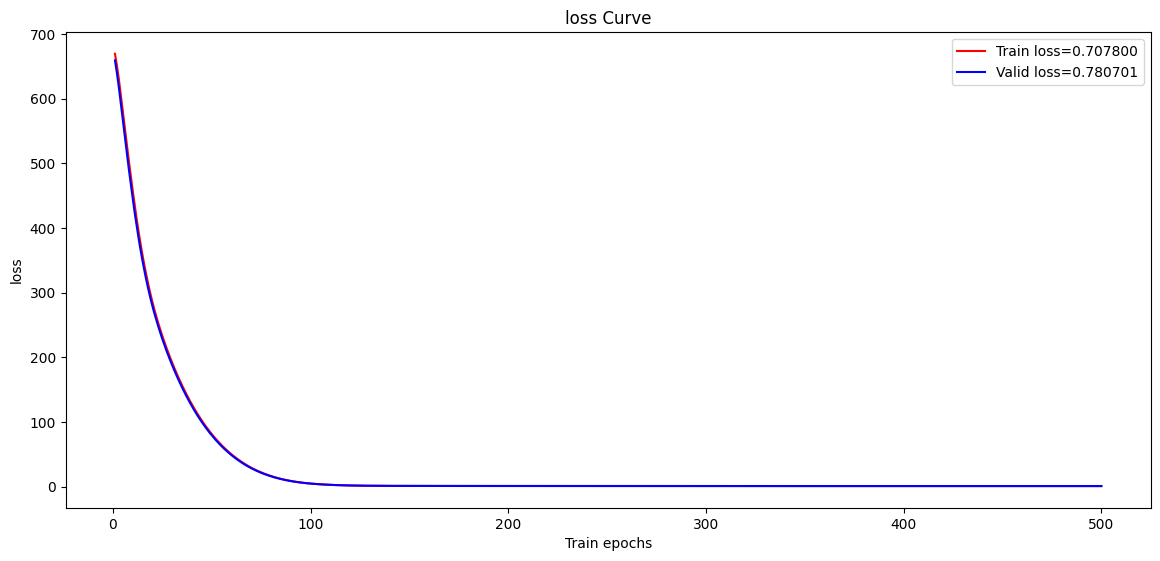

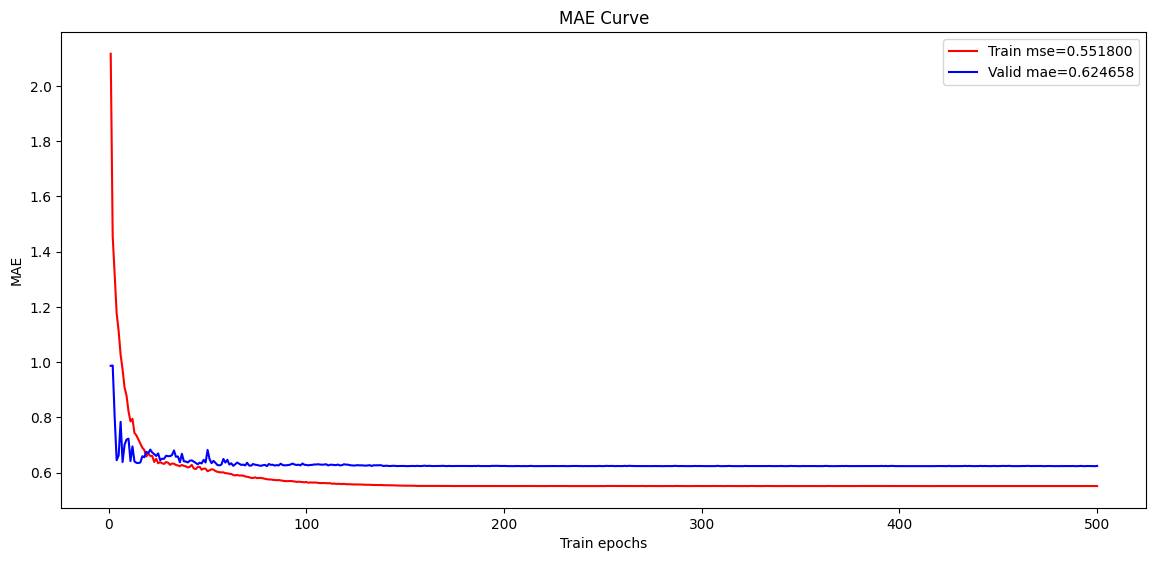

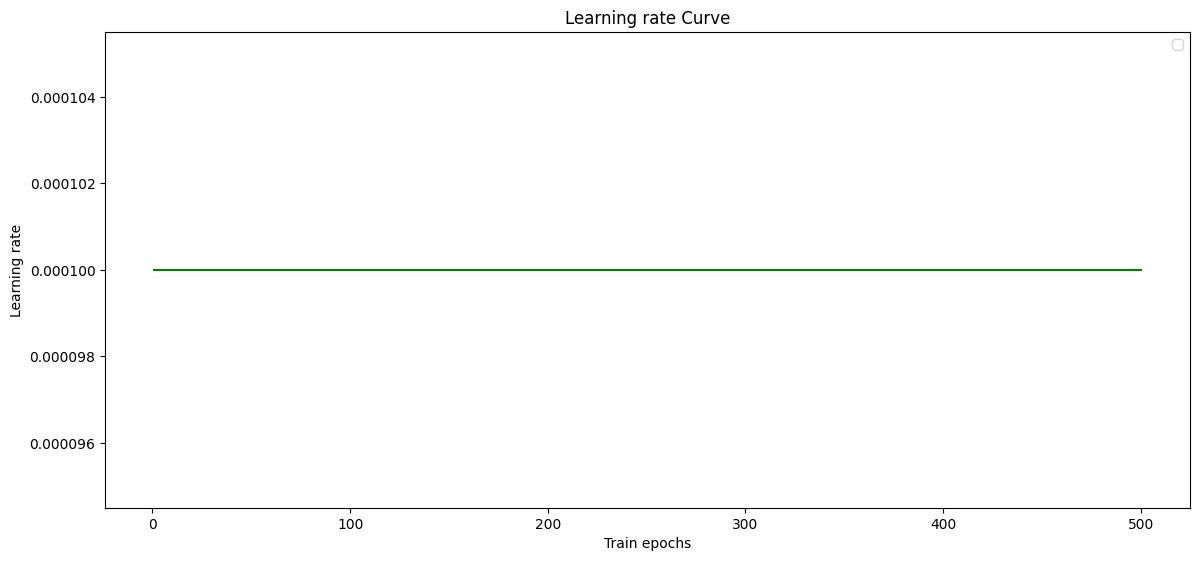

In [34]:
#绘制训练曲线
from pandas import DataFrame
TrainHistory=DataFrame(TrainHistory.history)
Epoch=TrainHistory.shape[0]
import numpy as np
fig=plt.figure(figsize=(14,21)) 
ax1=fig.add_subplot(311) #绘制误差曲线 
ax1.set_title('loss Curve') 
#ax1.grid(color='black',linestyle='-.',alpha=0.3) 
ax1.plot(np.arange(1,Epoch+1),TrainHistory['loss'],
         color='red',linestyle='-',label='Train loss=%f'%TrainHistory.loc[Epoch-1,'loss']) 
ax1.plot(np.arange(1,Epoch+1),TrainHistory['val_loss'],
         color='blue',linestyle='-',label='Valid loss=%f'%TrainHistory.loc[Epoch-1,'val_loss']) 
ax1.set_xlabel('Train epochs') 
ax1.set_ylabel('loss') 
ax1.legend() 
fig2=plt.figure(figsize=(14,21)) 
ax2=fig2.add_subplot(312) #绘制精度曲线 
ax2.set_title('MAE Curve') 
#ax2.grid(color='black',linestyle='-.',alpha=0.3) 
ax2.plot(np.arange(1,Epoch+1),TrainHistory['mae'],
         color='red',linestyle='-',label='Train mse=%f'%TrainHistory.loc[Epoch-1,'mae']) 
ax2.plot(np.arange(1,Epoch+1),TrainHistory['val_mae'],
         color='blue',linestyle='-',label='Valid mae=%f'%TrainHistory.loc[Epoch-1,'val_mae']) 
ax2.set_xlabel('Train epochs') 
ax2.set_ylabel('MAE') 
ax2.legend()
fig3=plt.figure(figsize=(14,21)) 
ax3=fig3.add_subplot(313) #绘制精度曲线 
ax3.set_title('Learning rate Curve') 
#ax3.grid(color='black',linestyle='-.',alpha=0.3) 
ax3.plot(np.arange(1,Epoch+1),TrainHistory['lr'],color='green',linestyle='-') 
ax3.set_xlabel('Train epochs') 
ax3.set_ylabel('Learning rate') 
ax3.legend()

In [32]:
#评估模型
AntiAndInspection.evaluate({'Inspection_input':DLTest_Inspection_Re,'Anti_input':DLTest_Anti_Re},[DL_TestTarget])

10/10 [==============================] - 0s 7ms/step - loss: 0.7325 - mae: 0.5764


[0.7324590682983398, 0.5764163732528687]

In [33]:
#保存模型
AntiAndInspection.save('/mnt/workspace/ML_Analysis/DeeplLearning_Models/AntiAndInspection_Re.h5')
AntiAndInspection.save('/mnt/workspace/ML_Analysis/DeeplLearning_Models/AntiAndInspection_Re')

INFO:tensorflow:Assets written to: /mnt/workspace/ML_Analysis/DeeplLearning_Models/AntiAndInspection_Re/assets


INFO:tensorflow:Assets written to: /mnt/workspace/ML_Analysis/DeeplLearning_Models/AntiAndInspection_Re/assets
